## Breast Cancer Prediction

The purpose of this project is to build a predictive model that can classify a tumor as benign or malignant based in the characteristics of the cell nuclei obtained of the digitized image of a FNA (Fine Needle Aspiration Biopsy) of a breast mass.
The data used for the project is available on [https://www.kaggle.com/uciml/breast-cancer-wisconsin-data]

 

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import plotly
import plotly.express as ex
import plotly.graph_objs as go
import ipywidgets 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from library.sb_utils import save_file

C:\Users\avel8\anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\avel8\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Importing the data

In [2]:
# df = pd.read_csv("../input/data.csv", index_col = 'id')
df=pd.read_csv(r'C:\Users\avel8\OneDrive\Documents\SPRINGBOARD\Capstone_two\breast_cancer_data.csv', index_col = 'id')

## Exploring Imported Data

In [3]:
# Reading the first 5 rows
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Print test Data Frame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

__Observation__
One categorical variable and 30 numerical

## Checking for Missing values

In [5]:
# Finding missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
diagnosis,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0
radius_worst,0,0.0
fractal_dimension_se,0,0.0


__Observation__
There is no missing values and no NAN. The data is very clean.

## Exploratory Data Analysis and Data Visualization

In [6]:
# Review the general statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# The target variable is the diagnosis. Let's chek the distribuition of the target
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

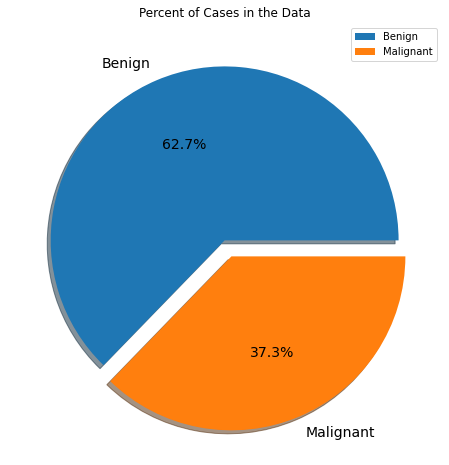

In [8]:
# visuallization of the diagnosis distribuition
# Pie chart representation
pie_labels = ['Benign', 'Malignant']

#Number of benign and malignant cases
pie_y = df['diagnosis'].value_counts()

pie_explode = [0, 0.1]

plt.figure(figsize=(10, 8))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

__Observation__
The mayority are Bening cases with 62,7 percent. Malignant are 37.3 percent.
The Diagnosis is the target feature

In [9]:
#check diagnosis types count
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#making the diagnosis a numerical Value
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_copy = df.copy()

## Univariate Analysis

In [12]:
# features_mean=list(df.columns[1:11])
df = df_copy.copy()
features=list(df.loc[:,["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
                       "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
                       "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]])
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

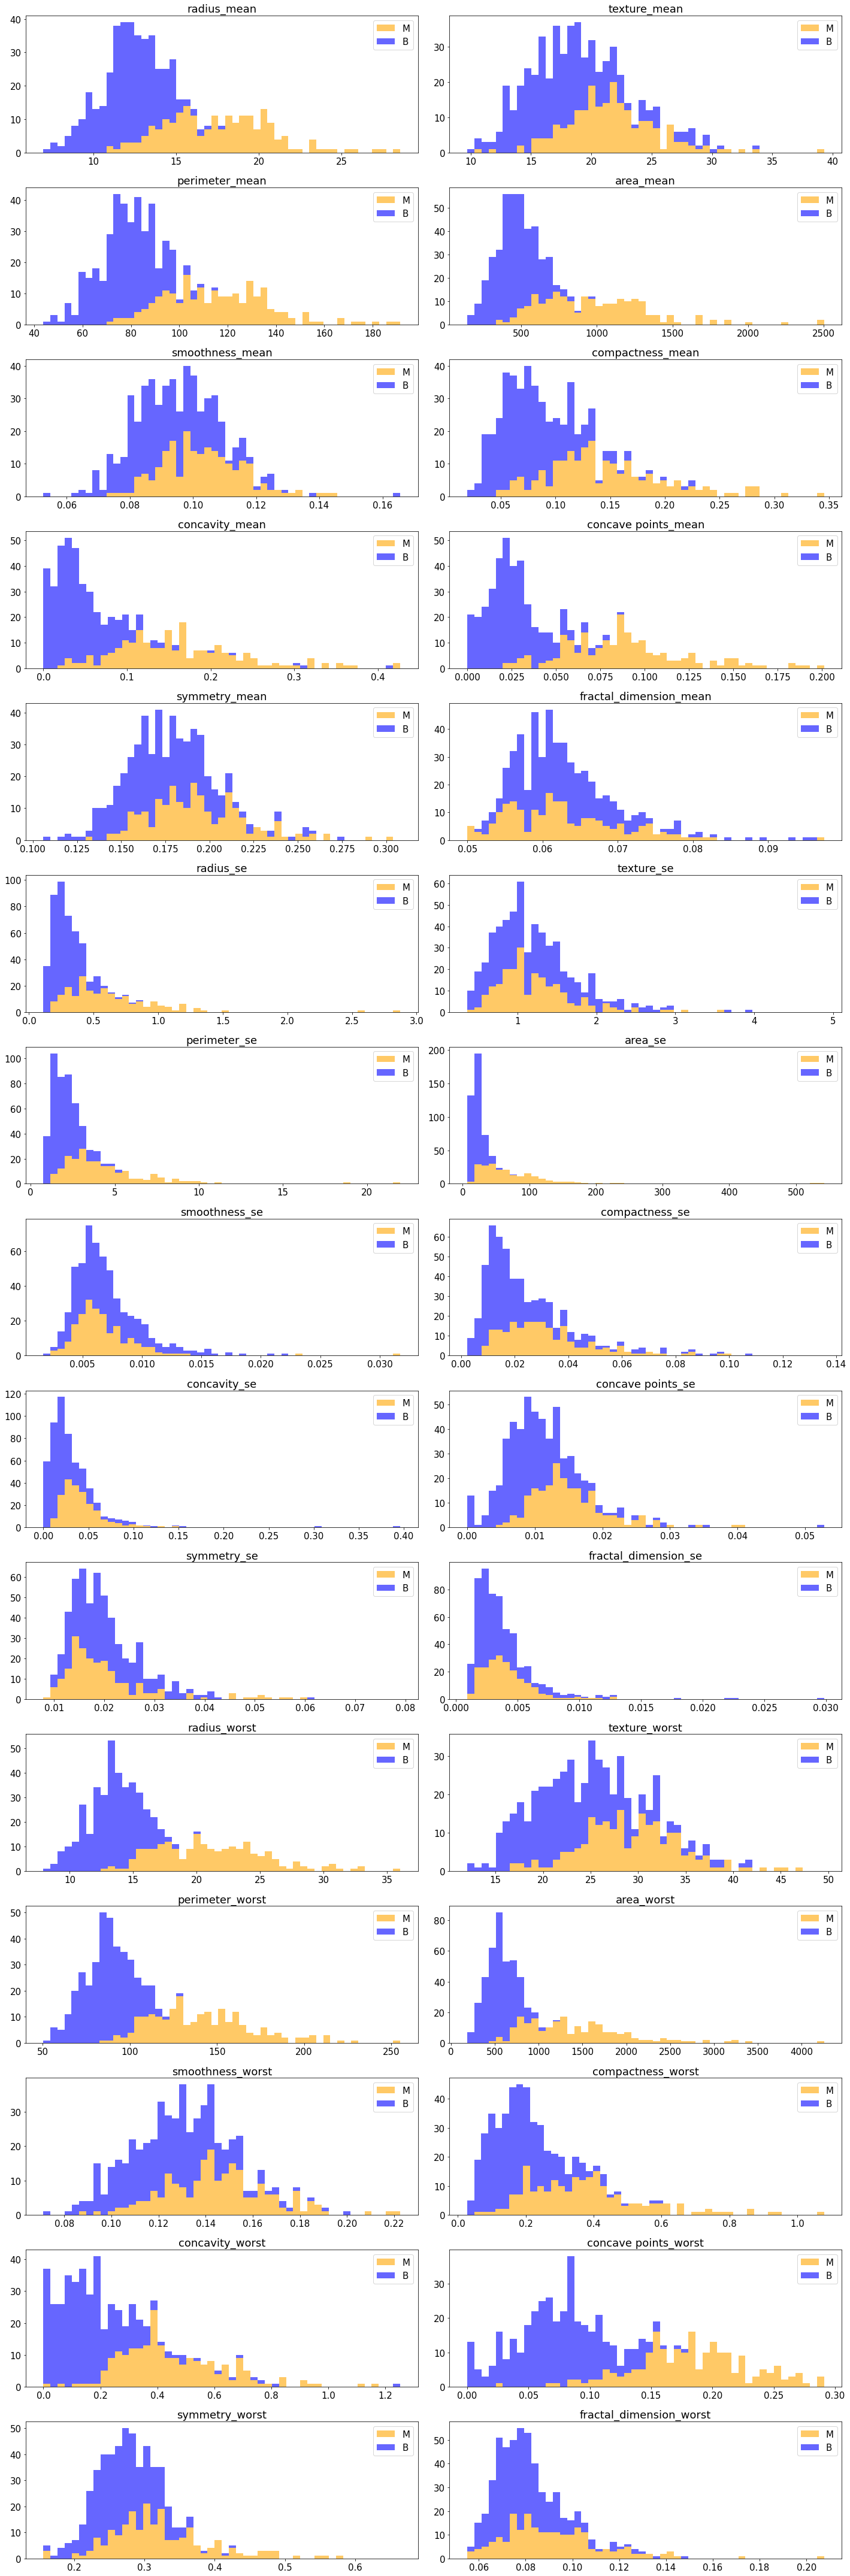

In [13]:
#Stack the data
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(20,60))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features[idx]]) - min(df[features[idx]]))/50
    ax.hist([dfM[features[idx]],dfB[features[idx]]], bins=np.arange(min(df[features[idx]]), max(df[features[idx]]) + binwidth, binwidth) , alpha=0.6, stacked=True, label=['M','B'],color=['Orange', 'Blue'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

__Observation__
From the visualization of the histograms of all the features it appears that larger values of the following  variables: radius_mean, perimeter_mean,area_mean, concave points_mean, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst and concave points worst tends to show a correlation with malignant tumors. 

In [14]:
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

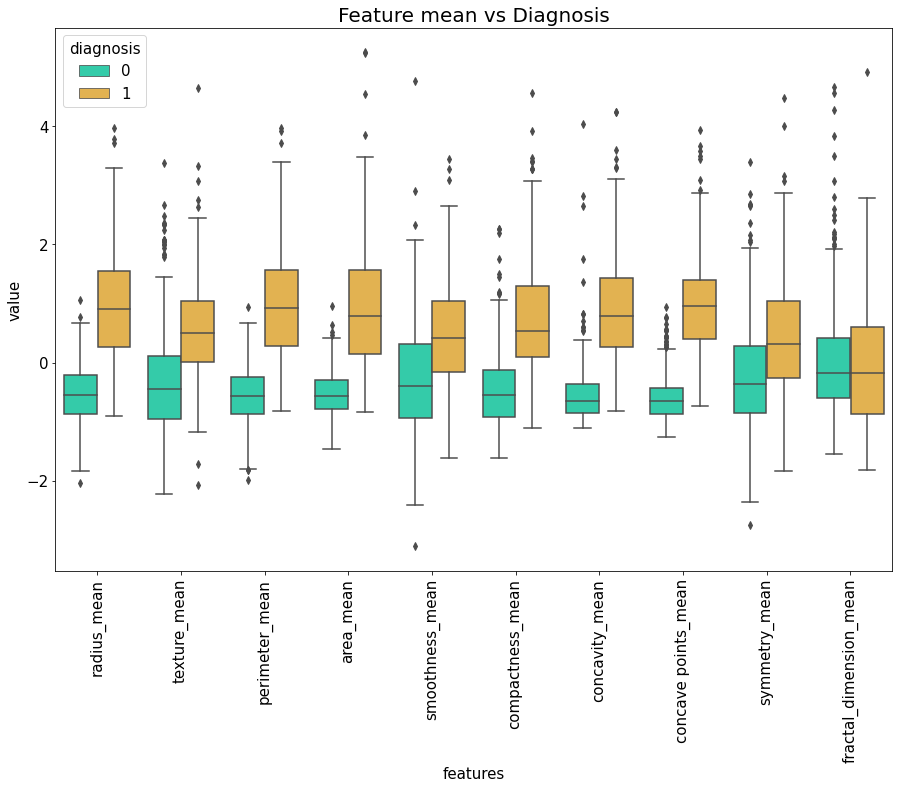

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature mean vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

__Observation__
From the visualization of the features mean plot box is noticeable that the median for malignant mass is higher than the benign mass except for the fractal dimension

In [96]:
tm_m = df['texture_mean'][df['diagnosis'] ==1]
tm_b = df['texture_mean'][df['diagnosis'] ==0]

In [97]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(tm_m, tm_b, equal_var=True)

Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [99]:
fd_m = df['fractal_dimension_mean'][df['diagnosis'] ==1]
fd_b = df['fractal_dimension_mean'][df['diagnosis'] ==0]

In [100]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(fd_m, fd_b, equal_var=True)

Ttest_indResult(statistic=-0.30571112978583087, pvalue=0.7599368037256238)

__Observation__
from the t statistics run above was veified that features like texture_mean was statistical significant, while fractal_dimension_mean was not

In [16]:
df=df_copy.copy()
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

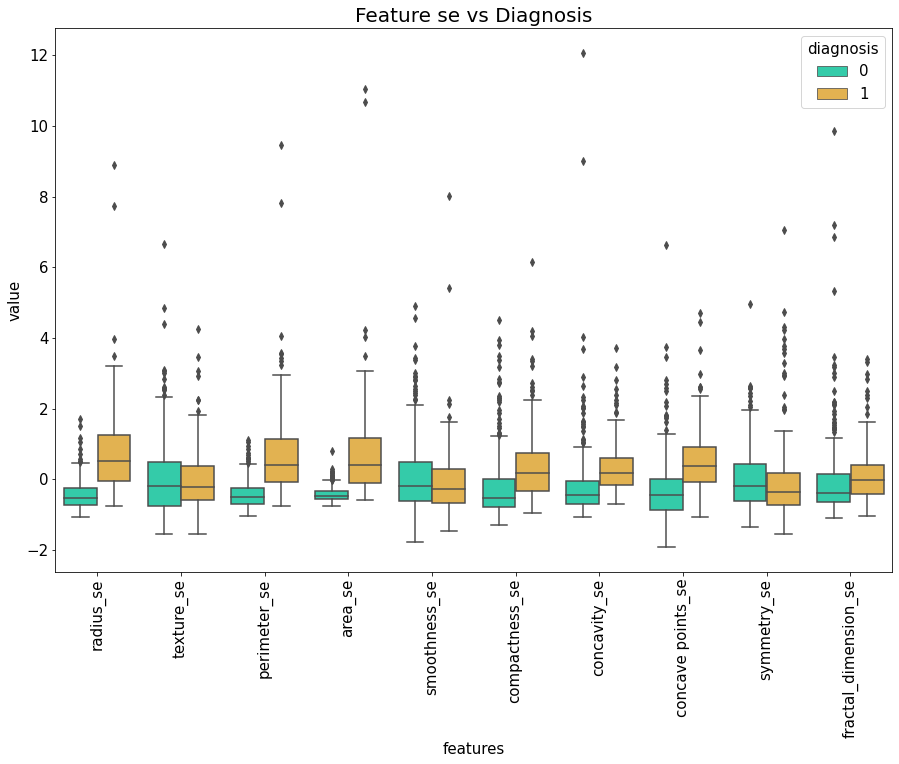

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature se vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [94]:
ase_m = df['area_se'][df['diagnosis'] ==1]
ase_b = df['area_se'][df['diagnosis'] ==0]

In [95]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(ase_m, ase_b, equal_var=True)

Ttest_indResult(statistic=15.609342900255001, pvalue=5.8955213926058635e-46)

__Observation__
from the t statistics run above was verified that features like area_se is statistical significant 

In [18]:
df=df_copy.copy()
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

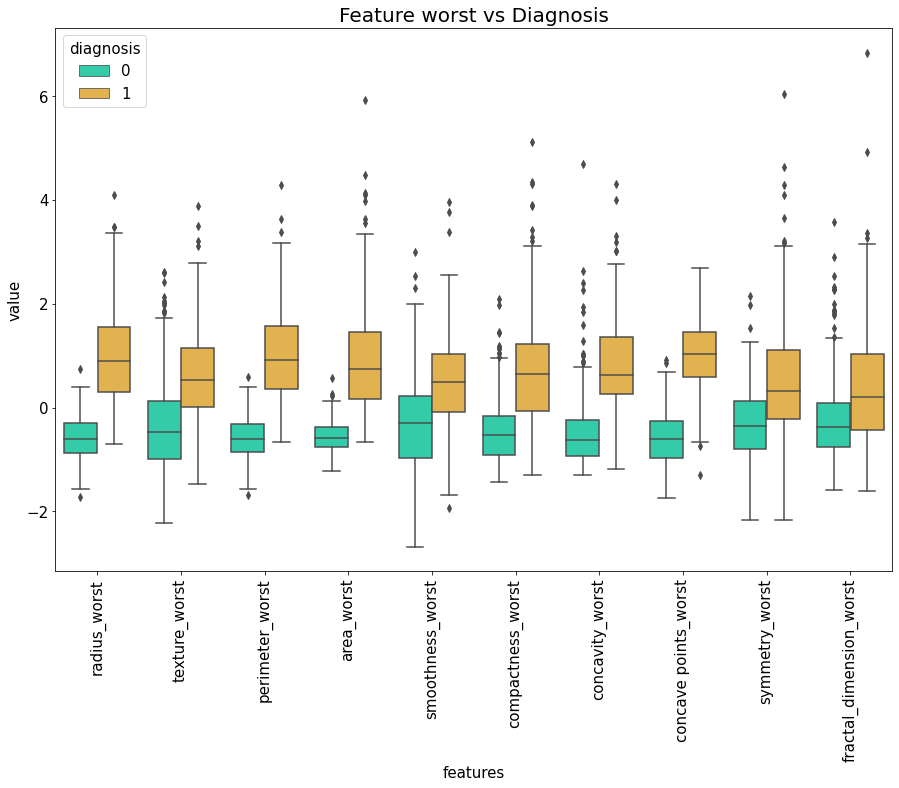

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature worst vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [92]:
cpw_m = df['concave points_worst'][df['diagnosis'] ==1]
cpw_b = df['concave points_worst'][df['diagnosis'] ==0]

In [93]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(cpw_m, cpw_b, equal_var=True)

Ttest_indResult(statistic=31.054555115984236, pvalue=1.9690997072164375e-124)

__Observation__
Every Box plot includes markers indicating the median and the interquartile (middle 50%) range.  Generally speaking, for the benign mass the median is lower for all features except for smoothness_se, texture_se, symmetry_se and the fractal_dimension_mean
In any of the histograms or Box plot there are no noticeable large outliers that warrants further cleanup.

## Multivariate Analysis

In [20]:
df=df_copy.copy()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


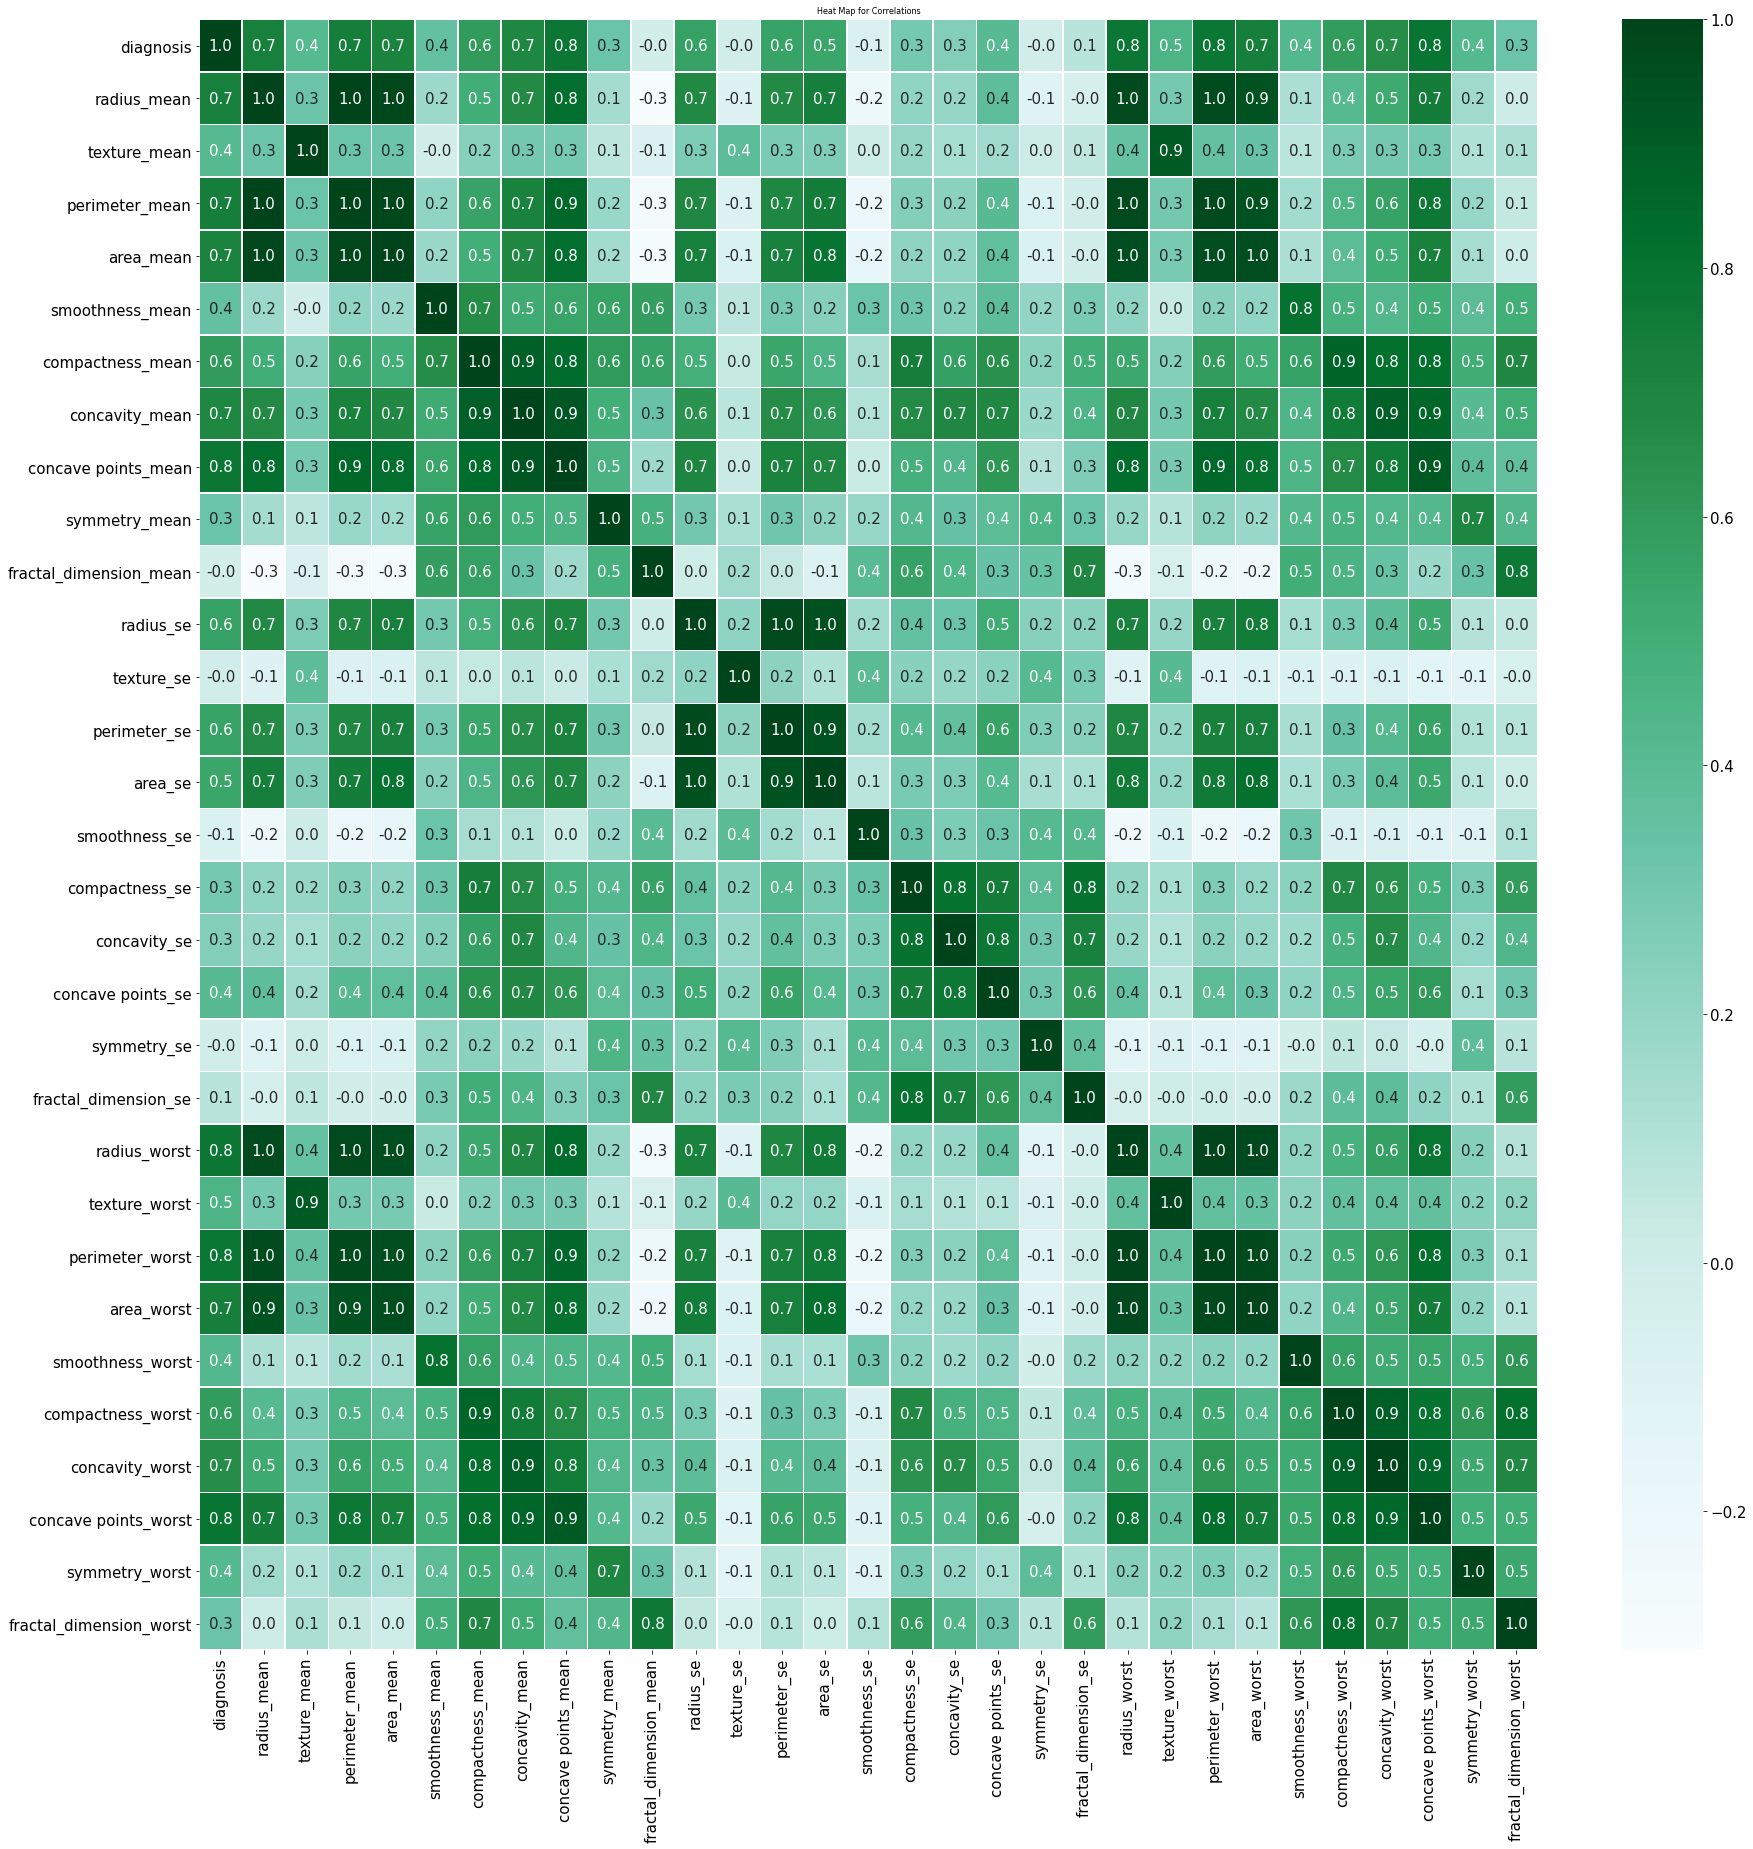

In [21]:
plt.rcParams['figure.figsize'] = (30, 30)

# sns.heatmap(df.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
sns.heatmap(df.corr(), cmap = 'BuGn', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 8)
plt.show()

In [22]:
corr = df.corr()
corr[abs(corr['diagnosis']) > 0.5].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

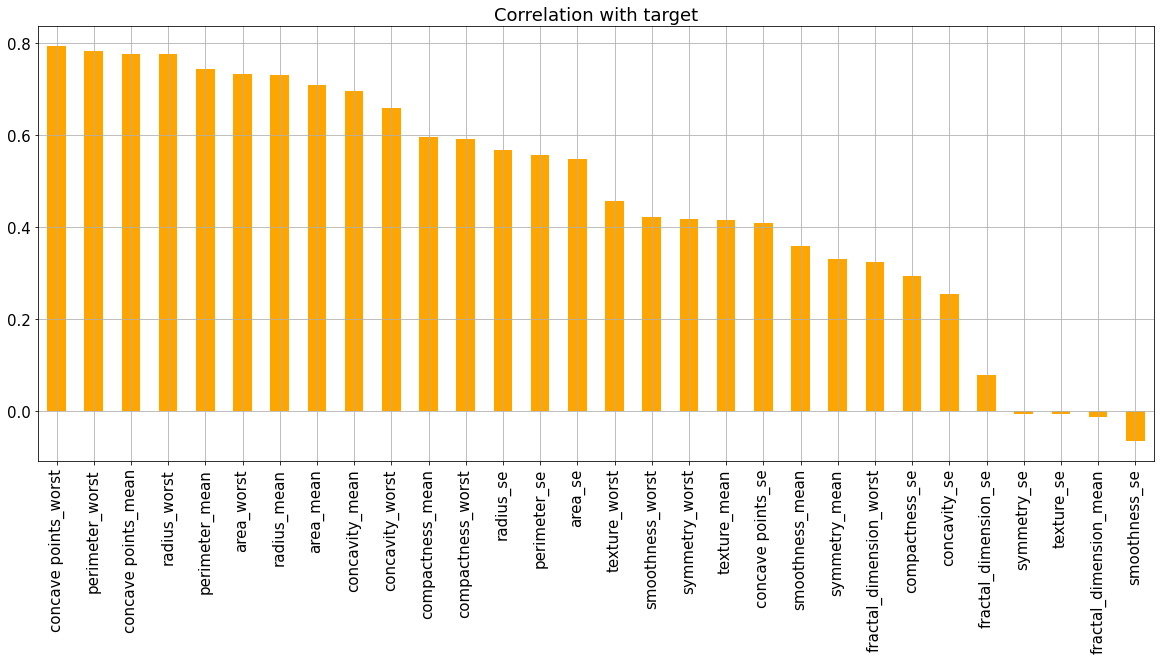

In [23]:
correl=df.drop('diagnosis', axis=1).corrwith(df.diagnosis)
df_c = correl.sort_values(ascending=False)
df_c.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="Orange");

__Observation__
There are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. 

In [27]:
corr_matrix = df.corr()
threshold = 0.70 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()

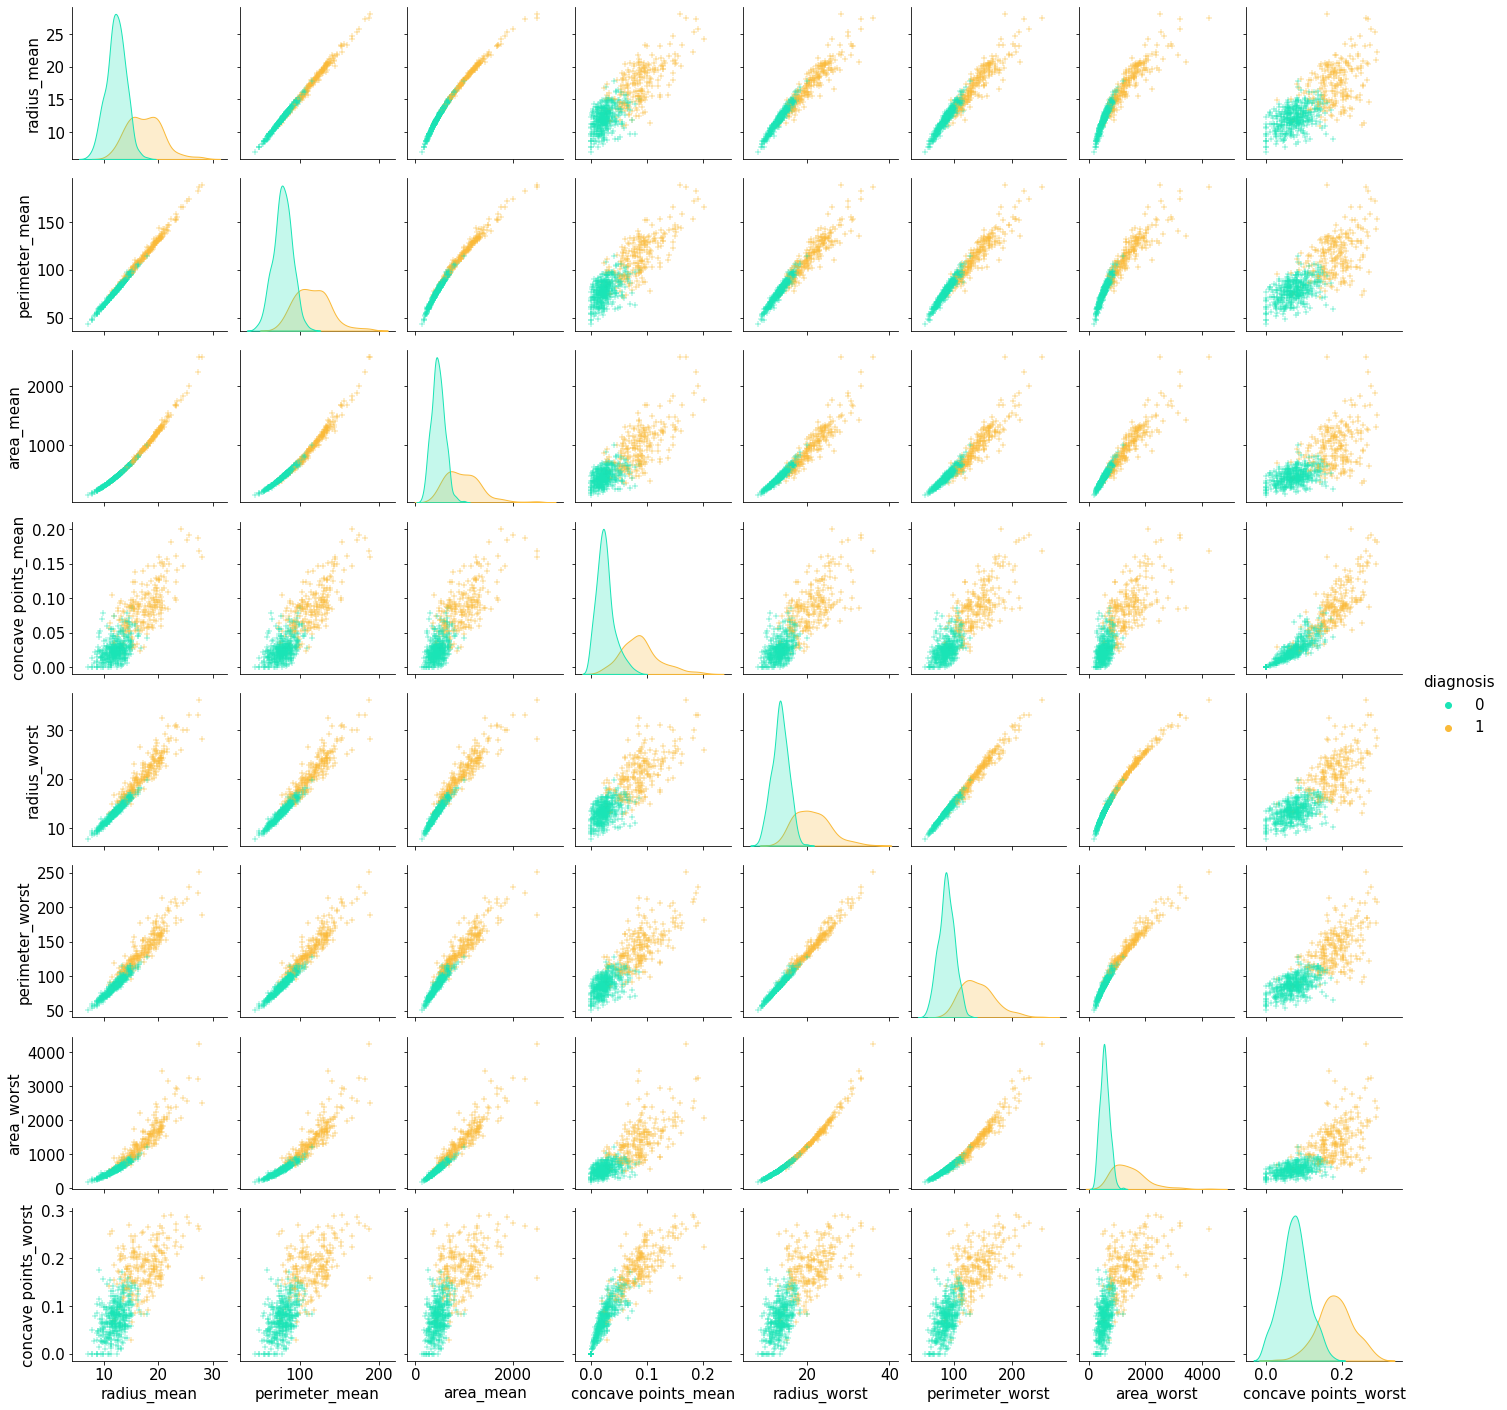

In [28]:
#pair plot
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette ="turbo")
plt.show()

__Scaling the Data__
In order to assest the collinearity and create a better model the variables were standartized, as their ranges were  quite different. 


In [29]:
df_all_scaled = df.copy()

column = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
         "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
features_all = df_all_scaled[column]
features_all.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_all_scaled[column] = scaler.fit_transform(features_all.values)
df_all_rscaled=df_all_scaled[column]

In [31]:
df_all_rscaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
842517,1.0,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
84300903,1.0,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
84348301,1.0,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
84358402,1.0,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


__Collinearity__
Having in mind that if we think of a cell as roughly taking a form of a circle, and that area and perimeter are defined by the radius (circle area= πr^2, circle perimeter = 2πr) Therefore features that refers to size as perimeter, radius, area have a high variance inflation factor because the three columns essentially contain the same information.
Similarly, it seems like there is multicollinearity between the attributes compactness, concavity, and concave points.
We would need to discard some of these variables before moving on to model building. 
Collinearity increases standard errors and makes estimates of our coefficients less precise. High levels of collinearity can cause standard errors to grow drastically.
The Variance Inflation Model by Statsmodels quantifies the severity of multicollinearity in an ordinary least squares regression analysis
The output should be less than 10.


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
  
# the independent variables set
X = df_all_rscaled[column]
 
# VIF dataframe
vif_all_rscaled = pd.DataFrame()
vif_all_rscaled["feature"] = X.columns
  
# calculating VIF for each feature
def calc_vif(X):
    X=sm.add_constant(X)
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
df_all_rscaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
842517,1.0,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
84300903,1.0,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
84348301,1.0,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
84358402,1.0,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [33]:
# X = df_rscaled.iloc[:,:-1]
# X_all = df_all_rscaled.iloc[:,:]
v=round(calc_vif(X),2)
v_sorted = v.sort_values(by='VIF', ascending=False) 
print(v_sorted)

                  variables      VIF
2               radius_mean  3817.26
4            perimeter_mean  3792.70
22             radius_worst   815.95
24          perimeter_worst   405.15
5                 area_mean   348.12
25               area_worst   343.49
12                radius_se    75.74
8            concavity_mean    71.00
14             perimeter_se    70.40
9       concave points_mean    60.17
7          compactness_mean    51.45
15                  area_se    41.20
27        compactness_worst    36.98
29     concave points_worst    36.78
28          concavity_worst    32.09
31  fractal_dimension_worst    18.98
23            texture_worst    18.61
18             concavity_se    15.91
11   fractal_dimension_mean    15.76
17           compactness_se    15.37
3              texture_mean    11.89
19        concave points_se    11.60
26         smoothness_worst    10.93
21     fractal_dimension_se     9.72
30           symmetry_worst     9.54
6           smoothness_mean     8.19
2

In [34]:
X_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'area_worst', 'perimeter_worst', 'radius_worst','concavity_worst', 
'texture_worst','texture_mean', 'area_se', 'radius_se', 'concavity_mean', 'symmetry_worst', 'area_mean', 'smoothness_worst',
'smoothness_se', 'perimeter_mean', 'compactness_se', 'fractal_dimension_se', 'perimeter_se', 'smoothness_mean']]
v20=round(calc_vif(X_20),2)
v20_sorted = v20.sort_values(by='VIF', ascending=False) 
print(v20_sorted)

               variables     VIF
5           radius_worst  511.74
16        perimeter_mean  375.88
4        perimeter_worst  311.70
3             area_worst  235.21
13             area_mean  227.49
10             radius_se   68.04
19          perimeter_se   54.03
2    concave points_mean   45.24
11        concavity_mean   38.59
9                area_se   31.12
1   concave points_worst   19.78
6        concavity_worst   18.79
7          texture_worst    9.26
8           texture_mean    8.61
14      smoothness_worst    8.42
17        compactness_se    6.84
20       smoothness_mean    6.34
18  fractal_dimension_se    4.11
15         smoothness_se    3.12
0                  const    2.06
12        symmetry_worst    1.82


In [35]:
X_9=df_all_rscaled[['concave points_worst', 'concavity_mean', 'texture_mean', 'area_worst', 'area_se', 
                    'smoothness_mean', 'symmetry_se', 'fractal_dimension_se', 'compactness_se']]
v9=round(calc_vif(X_9),2)
v9_sorted = v9.sort_values(by='VIF', ascending=False) 
print(v9_sorted)

              variables   VIF
2        concavity_mean  7.57
4            area_worst  7.57
1  concave points_worst  7.25
9        compactness_se  5.07
5               area_se  4.17
8  fractal_dimension_se  3.42
6       smoothness_mean  1.82
7           symmetry_se  1.46
0                 const  1.25
3          texture_mean  1.20


In [36]:
X_5= df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
v5=round(calc_vif(X_5),2)
v5_sorted = v5.sort_values(by='VIF', ascending=False) 
print(v5_sorted)

              variables   VIF
1       perimeter_worst  6.38
4  concave points_worst  5.23
3               area_se  2.51
2      smoothness_worst  1.77
5          texture_mean  1.15
0                 const  1.12


__Observation__

VIF sellection was used in conjuction with the Random Forest feature importance as way to verify that there wasn't collinearity

__Feature Importance__

Using the random forest Feature importance and Verifying for collinearity 4 set with all the features, 20, 9 and 5 were tested using ROC_AUC score to determine the best selection

In [37]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [38]:
Xtrain_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
         "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
ytrain_all= df_all_rscaled[['diagnosis']]

In [39]:
Xtrain_all=sm.add_constant(Xtrain_all)

In [40]:
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
         "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all= df_all_rscaled[['diagnosis']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

In [41]:
rf_all = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_all.fit(X_train_all, y_train_all.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [42]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_all.feature_importances_

array([0.00246519, 0.02173234, 0.00213572, 0.00624549, 0.00173068,
       0.00140246, 0.0035302 , 0.27342407, 0.00250575, 0.00159141,
       0.00850081, 0.00510713, 0.00378059, 0.01545186, 0.00335611,
       0.00279998, 0.00646987, 0.0009673 , 0.00294149, 0.00620904,
       0.08436302, 0.02911051, 0.08785248, 0.10389973, 0.00566905,
       0.00271204, 0.01628139, 0.28879436, 0.00562822, 0.00334171])

In [43]:
feature_names_all = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
         "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
list_of_tuples = list(zip(feature_names_all, rf_all.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_all = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_all', 'rf_all_feature_importances_'])
df_fim_all.sort_values(by=['rf_all_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_all)

          feature_names_all  rf_all_feature_importances_
27     concave points_worst                     0.288794
7       concave points_mean                     0.273424
23               area_worst                     0.103900
22          perimeter_worst                     0.087852
20             radius_worst                     0.084363
21            texture_worst                     0.029111
1              texture_mean                     0.021732
26          concavity_worst                     0.016281
13                  area_se                     0.015452
10                radius_se                     0.008501
16             concavity_se                     0.006470
3                 area_mean                     0.006245
19     fractal_dimension_se                     0.006209
24         smoothness_worst                     0.005669
28           symmetry_worst                     0.005628
11               texture_se                     0.005107
12             perimeter_se    

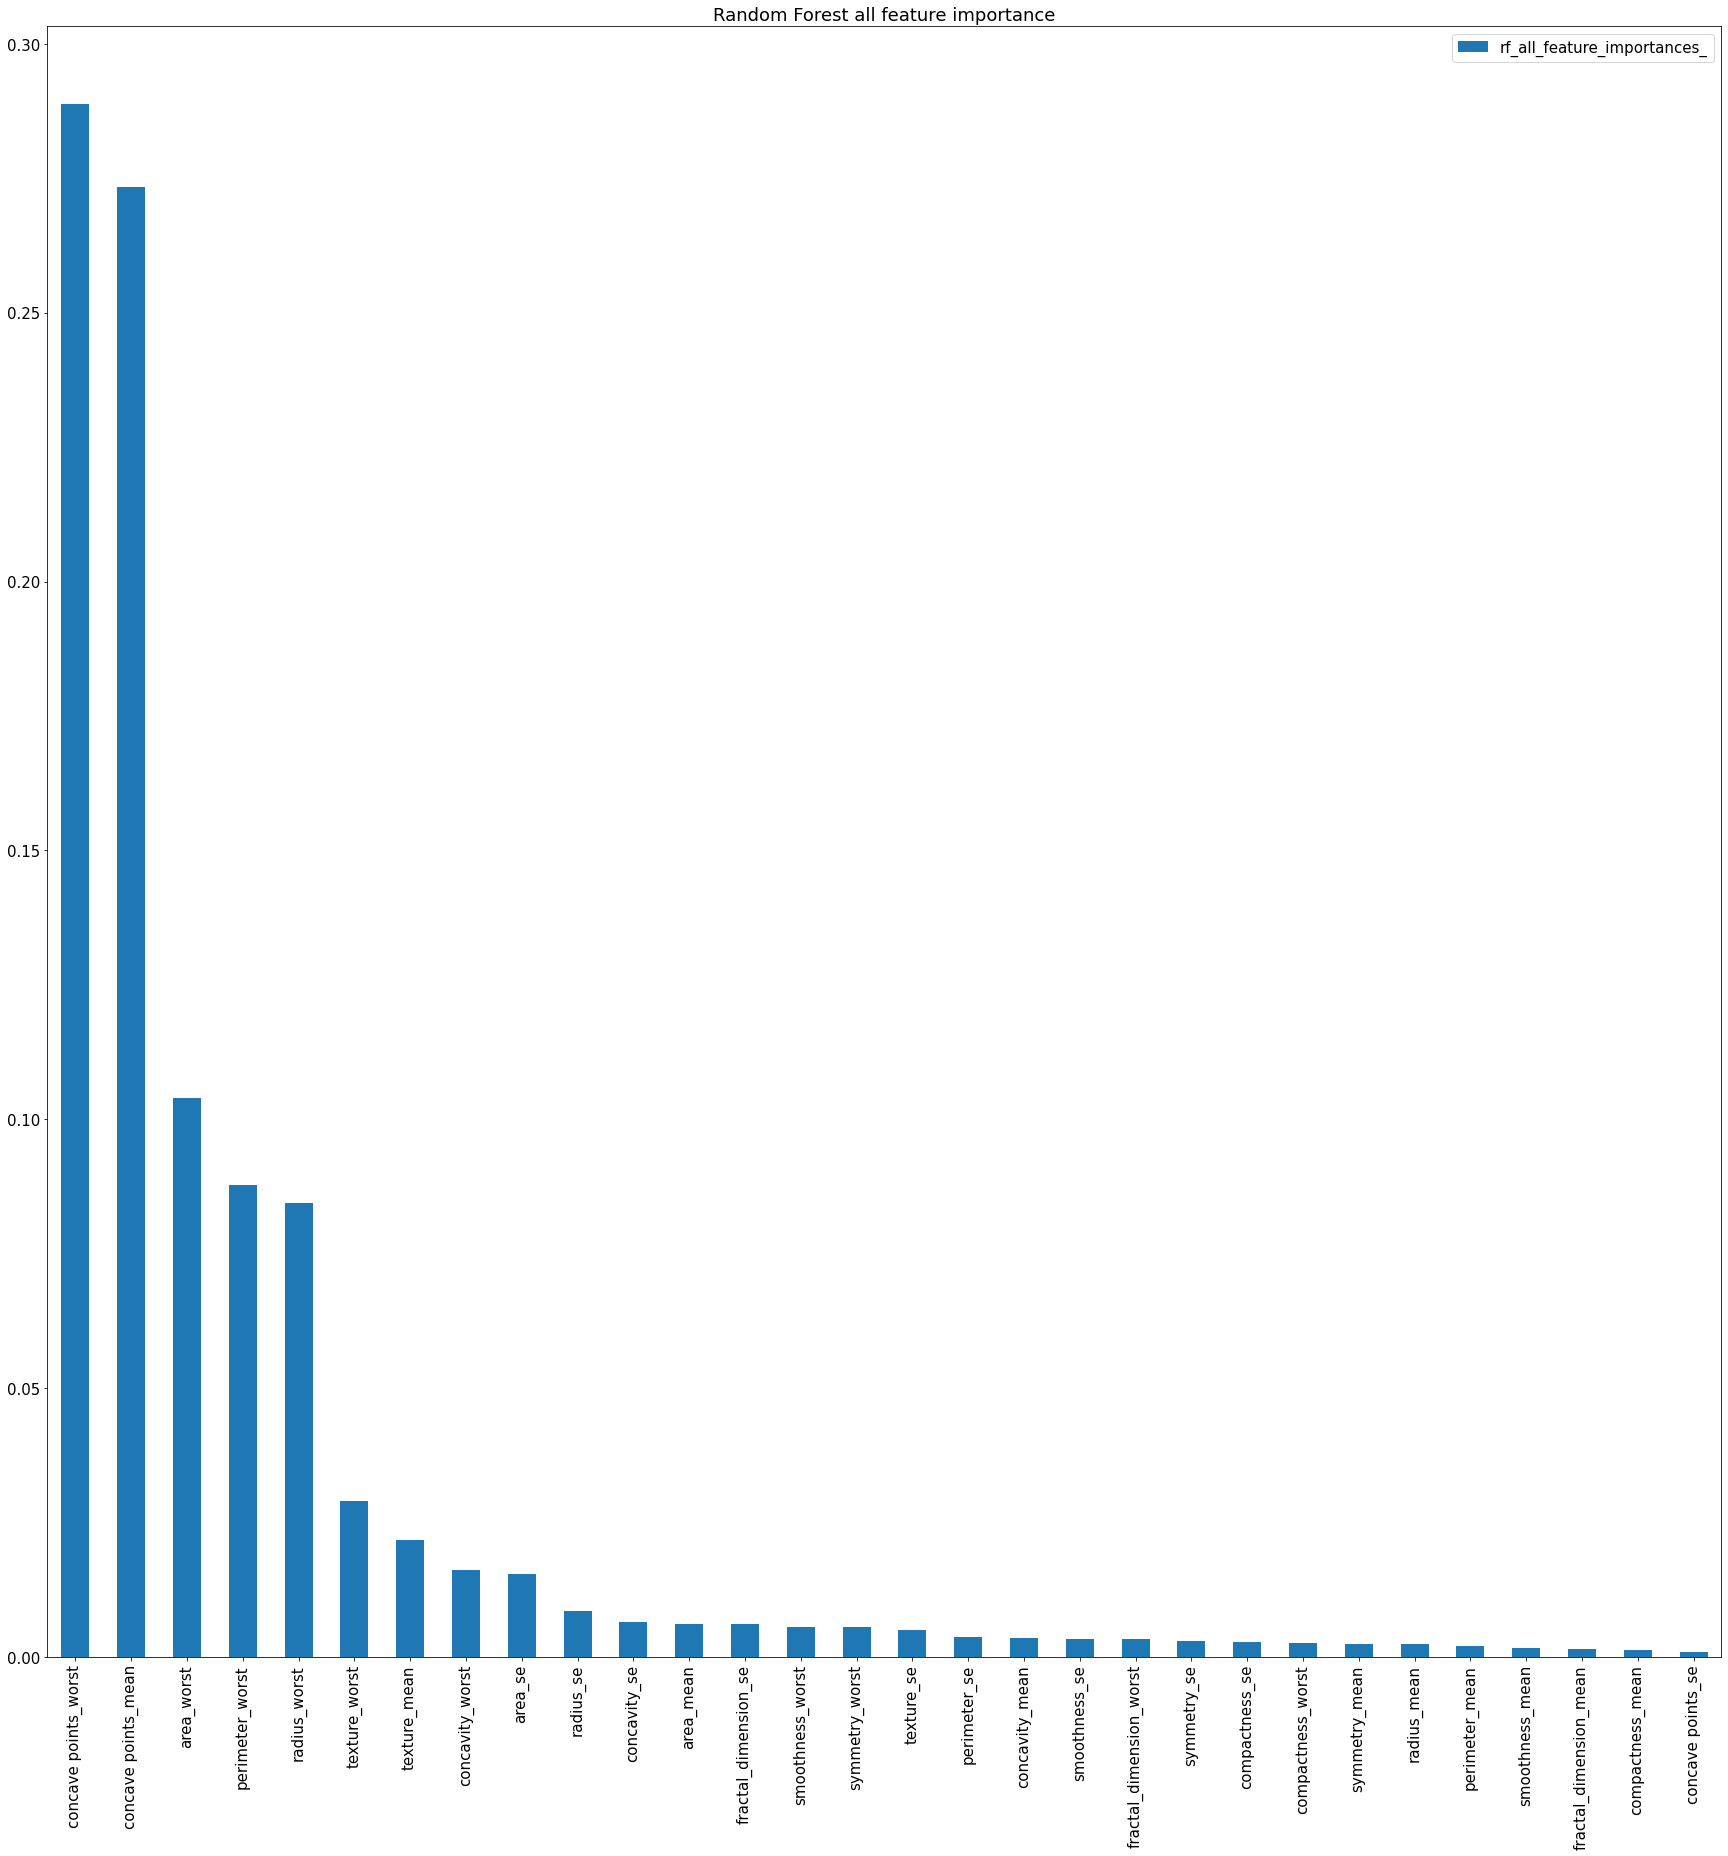

In [44]:
ax = df_fim_all[['feature_names_all','rf_all_feature_importances_']].sort_values(by='rf_all_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest all feature importance')
ax.set_xticklabels(df_fim_all.feature_names_all);

In [45]:
import shap
from matplotlib import pyplot as plt
explainer = shap.TreeExplainer(rf_all)
shap_values = explainer.shap_values(X_test_all)

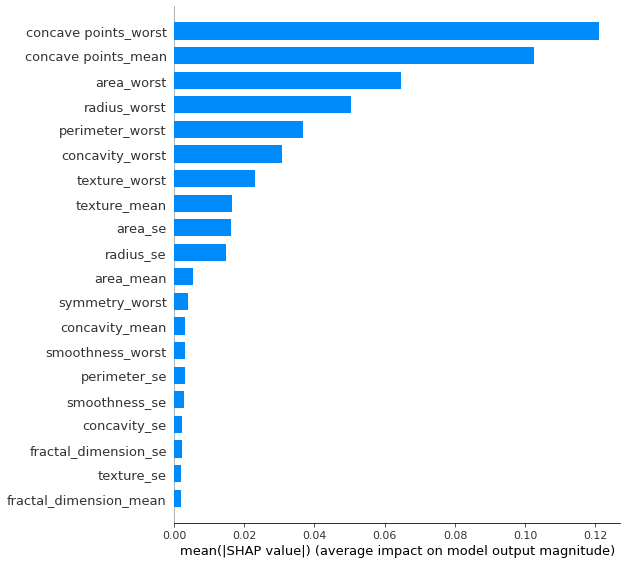

In [46]:
shap.summary_plot(shap_values, X_test_all, plot_type="bar")

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_all = RandomForestClassifier()
#Fitting the model
rfm_all.fit(X_train_all, y_train_all.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(y_test_all, rfm_all.predict_proba(X_test_all)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_test_all, rfm_all.predict_proba(X_test_all)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr, rf_tpr, _ = roc_curve(y_test_all, rfm_all.predict_proba(X_test_all)[:, 1])

ROC AUC score: 0.9968789013732834
Brier score is 0.023495104895104896


In [48]:
Xtrain_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'area_worst', 'perimeter_worst', 'radius_worst','concavity_worst', 
'texture_worst','texture_mean', 'area_se', 'radius_se', 'concavity_mean', 'symmetry_worst', 'area_mean', 'smoothness_worst',
'smoothness_se', 'perimeter_mean', 'compactness_se', 'fractal_dimension_se', 'perimeter_se', 'smoothness_mean']]
ytrain_20= df_all_rscaled[['diagnosis']]

In [49]:
Xtrain_20=sm.add_constant(Xtrain_20)

In [50]:
X_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'area_worst', 'perimeter_worst', 'radius_worst','concavity_worst', 
'texture_worst','texture_mean', 'area_se', 'radius_se', 'concavity_mean', 'symmetry_worst', 'area_mean', 'smoothness_worst',
'smoothness_se', 'perimeter_mean', 'compactness_se', 'fractal_dimension_se', 'perimeter_se', 'smoothness_mean']]
y_20= df_all_rscaled[['diagnosis']]
Xtrain_20, Xtest_20, ytrain_20, ytest_20 = train_test_split(X_20, y_20, test_size=0.25, random_state=42)

In [51]:
rf_20 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_20.fit(Xtrain_20, ytrain_20.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [52]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_20.feature_importances_

array([0.31579505, 0.24996577, 0.10927965, 0.10412416, 0.07169863,
       0.0201834 , 0.02642428, 0.0265279 , 0.01000207, 0.00920798,
       0.00435135, 0.00569254, 0.00806155, 0.00918368, 0.00384975,
       0.0055173 , 0.00389084, 0.01063548, 0.00261444, 0.00299419])

In [53]:
feature_names_20 = ['concave points_worst','concave points_mean', 'area_worst', 'perimeter_worst', 'radius_worst','concavity_worst', 
'texture_worst','texture_mean', 'area_se', 'radius_se', 'concavity_mean', 'symmetry_worst', 'area_mean', 'smoothness_worst',
'smoothness_se', 'perimeter_mean', 'compactness_se', 'fractal_dimension_se', 'perimeter_se', 'smoothness_mean']
list_of_tuples = list(zip(feature_names_20, rf_20.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_20 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_20', 'rf_20_feature_importances_'])
df_fim_20.sort_values(by=['rf_20_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_20)

        feature_names_20  rf_20_feature_importances_
0   concave points_worst                    0.315795
1    concave points_mean                    0.249966
2             area_worst                    0.109280
3        perimeter_worst                    0.104124
4           radius_worst                    0.071699
7           texture_mean                    0.026528
6          texture_worst                    0.026424
5        concavity_worst                    0.020183
17  fractal_dimension_se                    0.010635
8                area_se                    0.010002
9              radius_se                    0.009208
13      smoothness_worst                    0.009184
12             area_mean                    0.008062
11        symmetry_worst                    0.005693
15        perimeter_mean                    0.005517
10        concavity_mean                    0.004351
16        compactness_se                    0.003891
14         smoothness_se                    0.

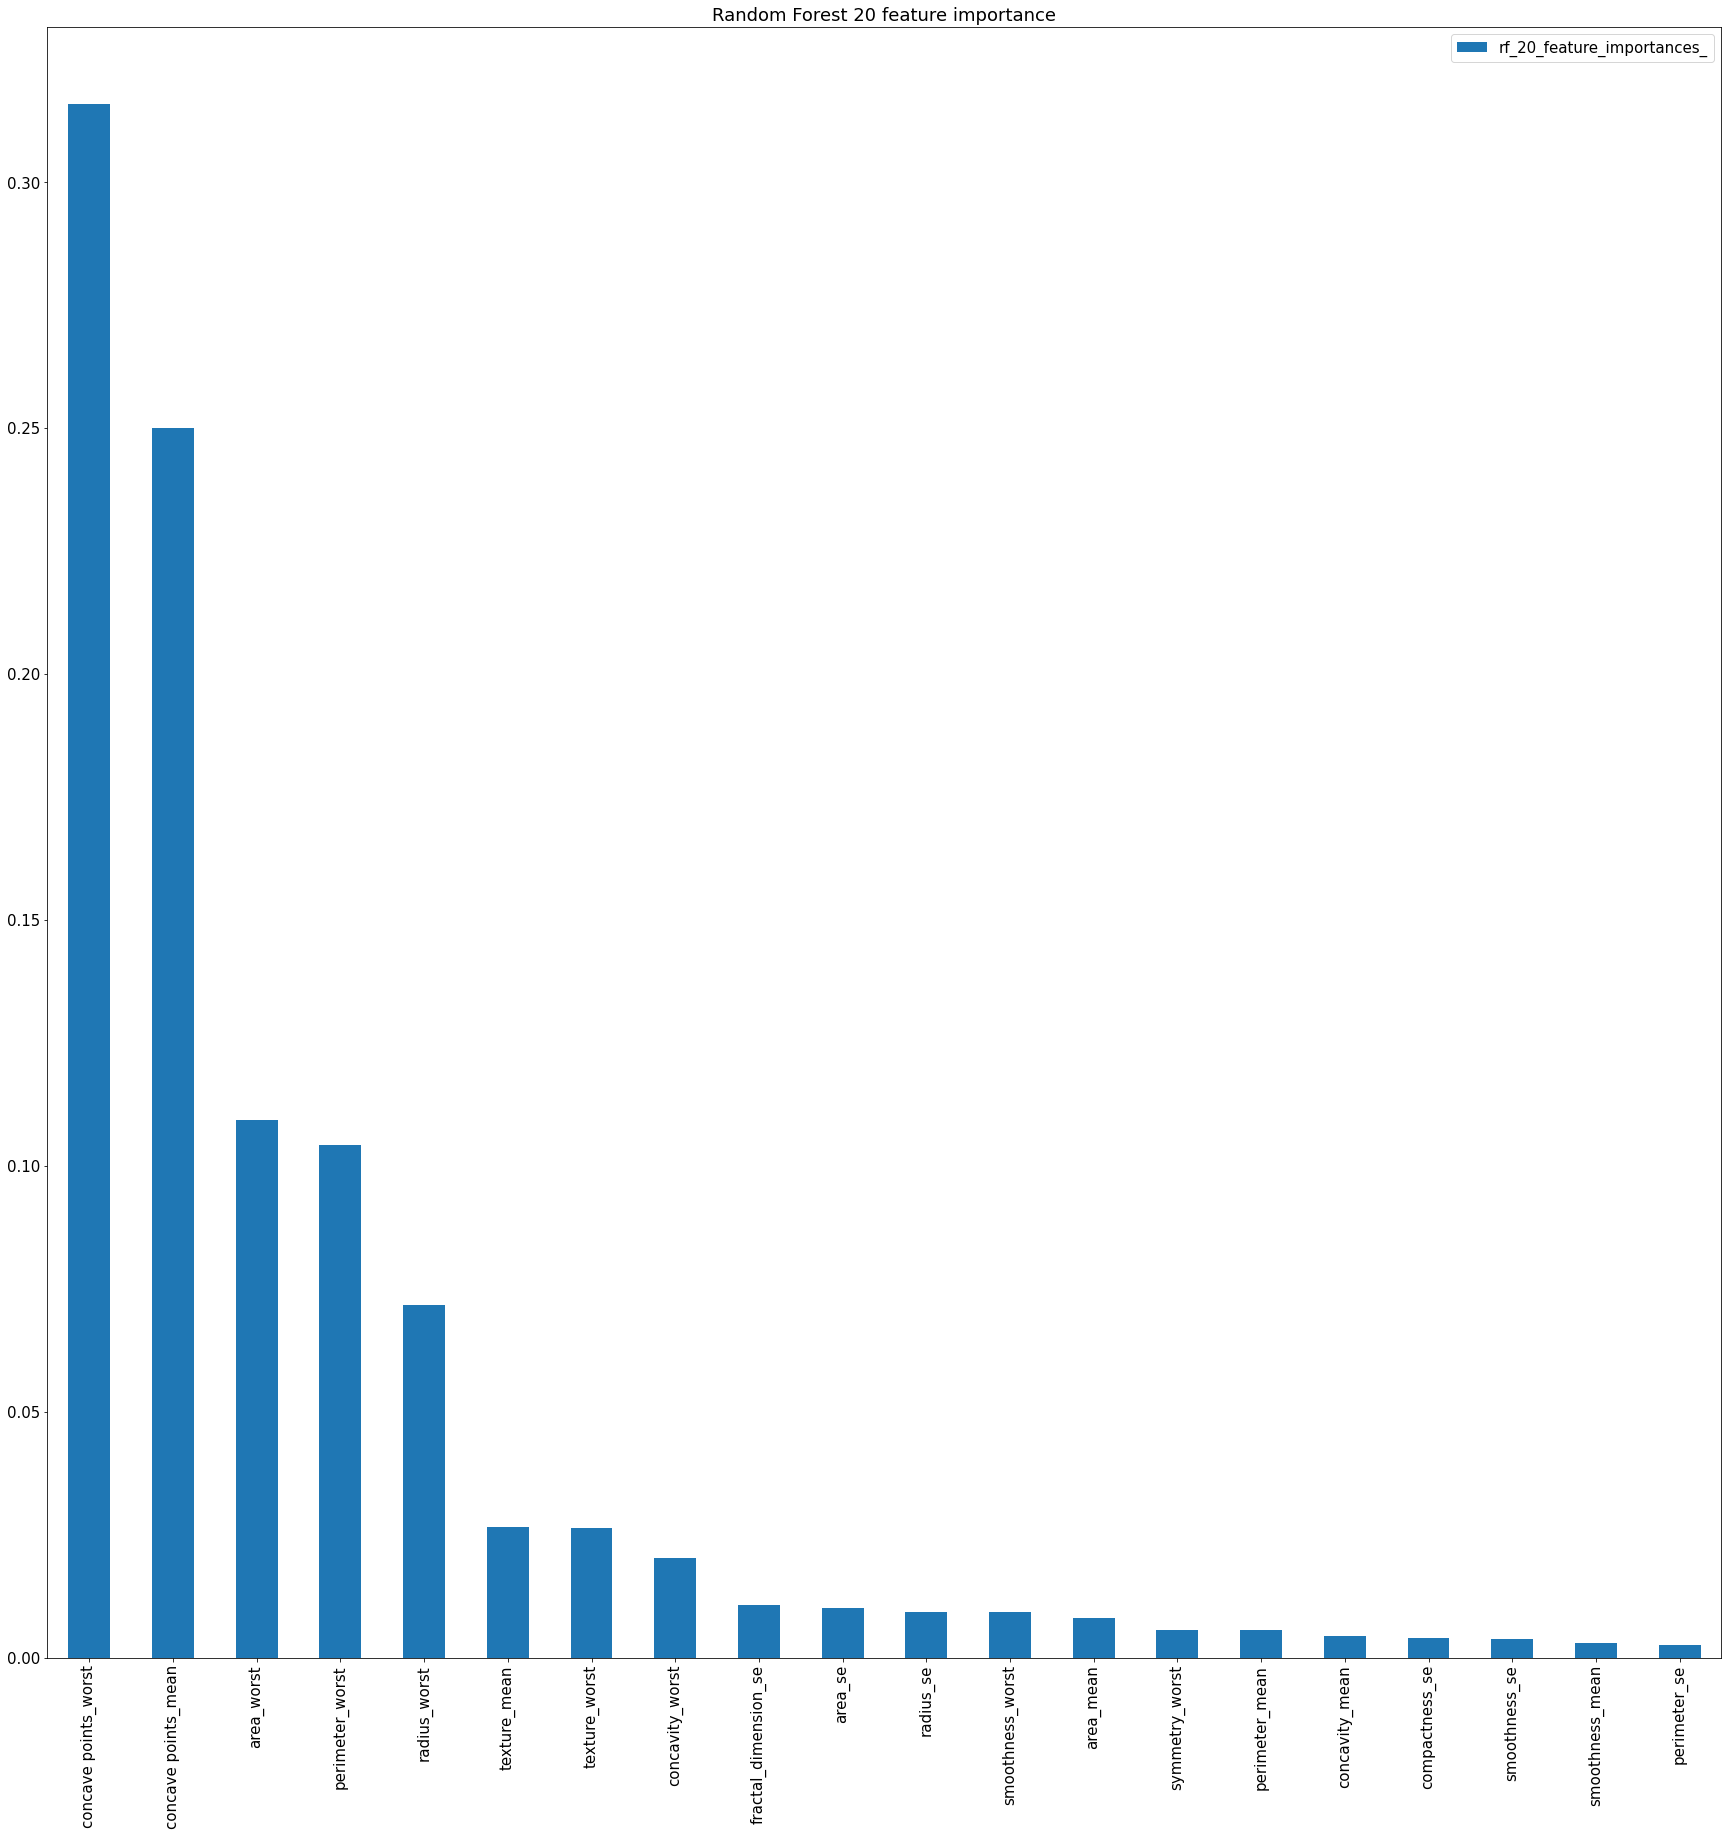

In [54]:
ax = df_fim_20[['feature_names_20','rf_20_feature_importances_']].sort_values(by='rf_20_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 20 feature importance')
ax.set_xticklabels(df_fim_20.feature_names_20);

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_20 = RandomForestClassifier()
#Fitting the model
rfm_20.fit(Xtrain_20, ytrain_20.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(ytest_20, rfm_20.predict_proba(Xtest_20)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(ytest_20, rfm_20.predict_proba(Xtest_20)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr, rf_tpr, _ = roc_curve(ytest_20, rfm_20.predict_proba(Xtest_20)[:, 1])

ROC AUC score: 0.9953183520599251
Brier score is 0.024435664335664336


In [56]:
Xtrain_9 = df_all_rscaled[['concave points_worst', 'concavity_mean', 'texture_mean', 'area_worst', 'area_se', 'smoothness_mean', 'symmetry_se', 'fractal_dimension_se', 'compactness_se']]
ytrain_9= df_all_rscaled[['diagnosis']]

In [57]:
Xtrain_9=sm.add_constant(Xtrain_9)

In [58]:
X_9 = df_all_rscaled[['concave points_worst', 'concavity_mean', 'texture_mean', 'area_worst', 'area_se', 'smoothness_mean','symmetry_se', 'fractal_dimension_se','compactness_se']]
y_9= df_all_rscaled[['diagnosis']]
Xtrain_9, Xtest_9, ytrain_9, ytest_9 = train_test_split(X_9, y_9, test_size=0.25, random_state=42)

In [59]:
rf_9 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_9.fit(Xtrain_9, ytrain_9.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [60]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_9.feature_importances_

array([0.53513138, 0.01860032, 0.04592839, 0.32829274, 0.02891336,
       0.01038407, 0.00756366, 0.01833874, 0.00684735])

In [61]:
feature_names_9 = ['concave points_worst', 'concavity_mean', 'texture_mean', 'area_worst', 'area_se', 'smoothness_mean','symmetry_se', 'fractal_dimension_se', 'compactness_se']
list_of_tuples = list(zip(feature_names_9, rf_9.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_9 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_9', 'rf_9_feature_importances_'])
df_fim_9.sort_values(by=['rf_9_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_9)

        feature_names_9  rf_9_feature_importances_
0  concave points_worst                   0.535131
3            area_worst                   0.328293
2          texture_mean                   0.045928
4               area_se                   0.028913
1        concavity_mean                   0.018600
7  fractal_dimension_se                   0.018339
5       smoothness_mean                   0.010384
6           symmetry_se                   0.007564
8        compactness_se                   0.006847


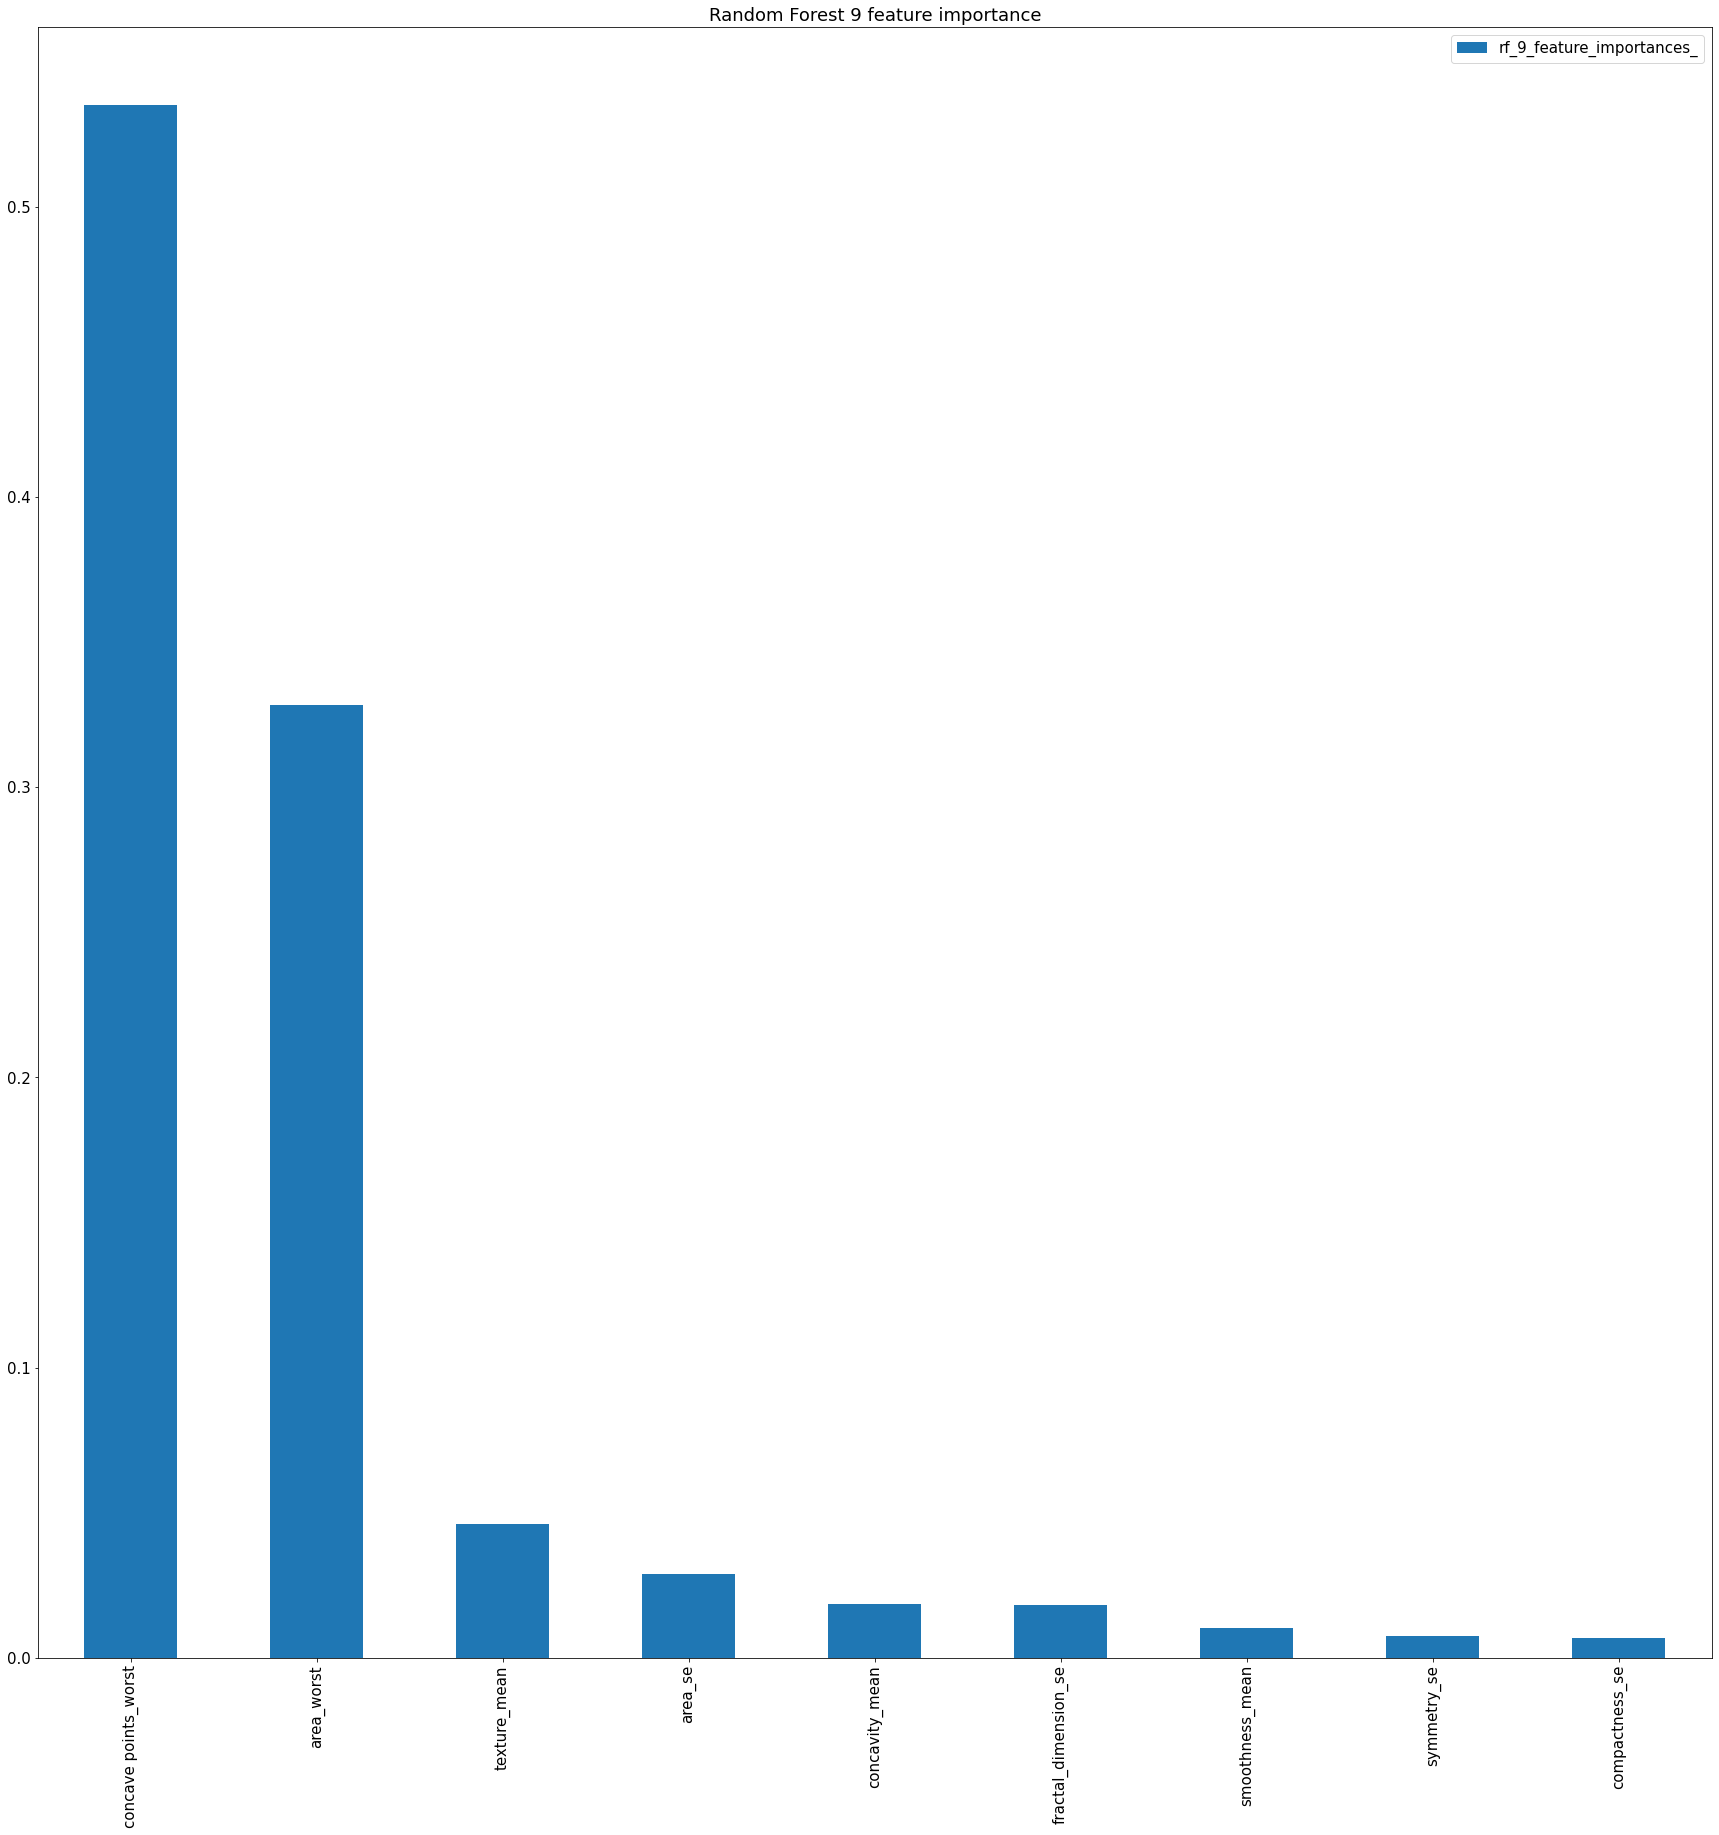

In [62]:
ax = df_fim_9[['feature_names_9','rf_9_feature_importances_']].sort_values(by='rf_9_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 9 feature importance')
ax.set_xticklabels(df_fim_9.feature_names_9);

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_9 = RandomForestClassifier()
#Fitting the model
rfm_9.fit(Xtrain_9, ytrain_9.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(ytest_9, rfm_9.predict_proba(Xtest_9)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(ytest_9, rfm_9.predict_proba(Xtest_9)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr, rf_tpr, _ = roc_curve(ytest_9, rfm_9.predict_proba(Xtest_9)[:, 1])

ROC AUC score: 0.9950062421972534
Brier score is 0.02716083916083916


In [64]:
Xtrain_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
ytrain_5= df_all_rscaled[['diagnosis']]

In [65]:
Xtrain_5=sm.add_constant(Xtrain_5)

In [66]:
X_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5= df_all_rscaled[['diagnosis']]
Xtrain_5, Xtest_5, ytrain_5, ytest_5 = train_test_split(X_5, y_5, test_size=0.25, random_state=42)

In [67]:
rf_5 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_5.fit(Xtrain_5, ytrain_5.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [68]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_5.feature_importances_

array([0.30968044, 0.03297011, 0.05273937, 0.54403464, 0.06057544])

In [69]:
feature_names_5 = ['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']
list_of_tuples = list(zip(feature_names_5, rf_5.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_5 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_5', 'rf_5_feature_importances_'])
df_fim_5.sort_values(by=['rf_5_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_5)

        feature_names_5  rf_5_feature_importances_
3  concave points_worst                   0.544035
0       perimeter_worst                   0.309680
4          texture_mean                   0.060575
2               area_se                   0.052739
1      smoothness_worst                   0.032970


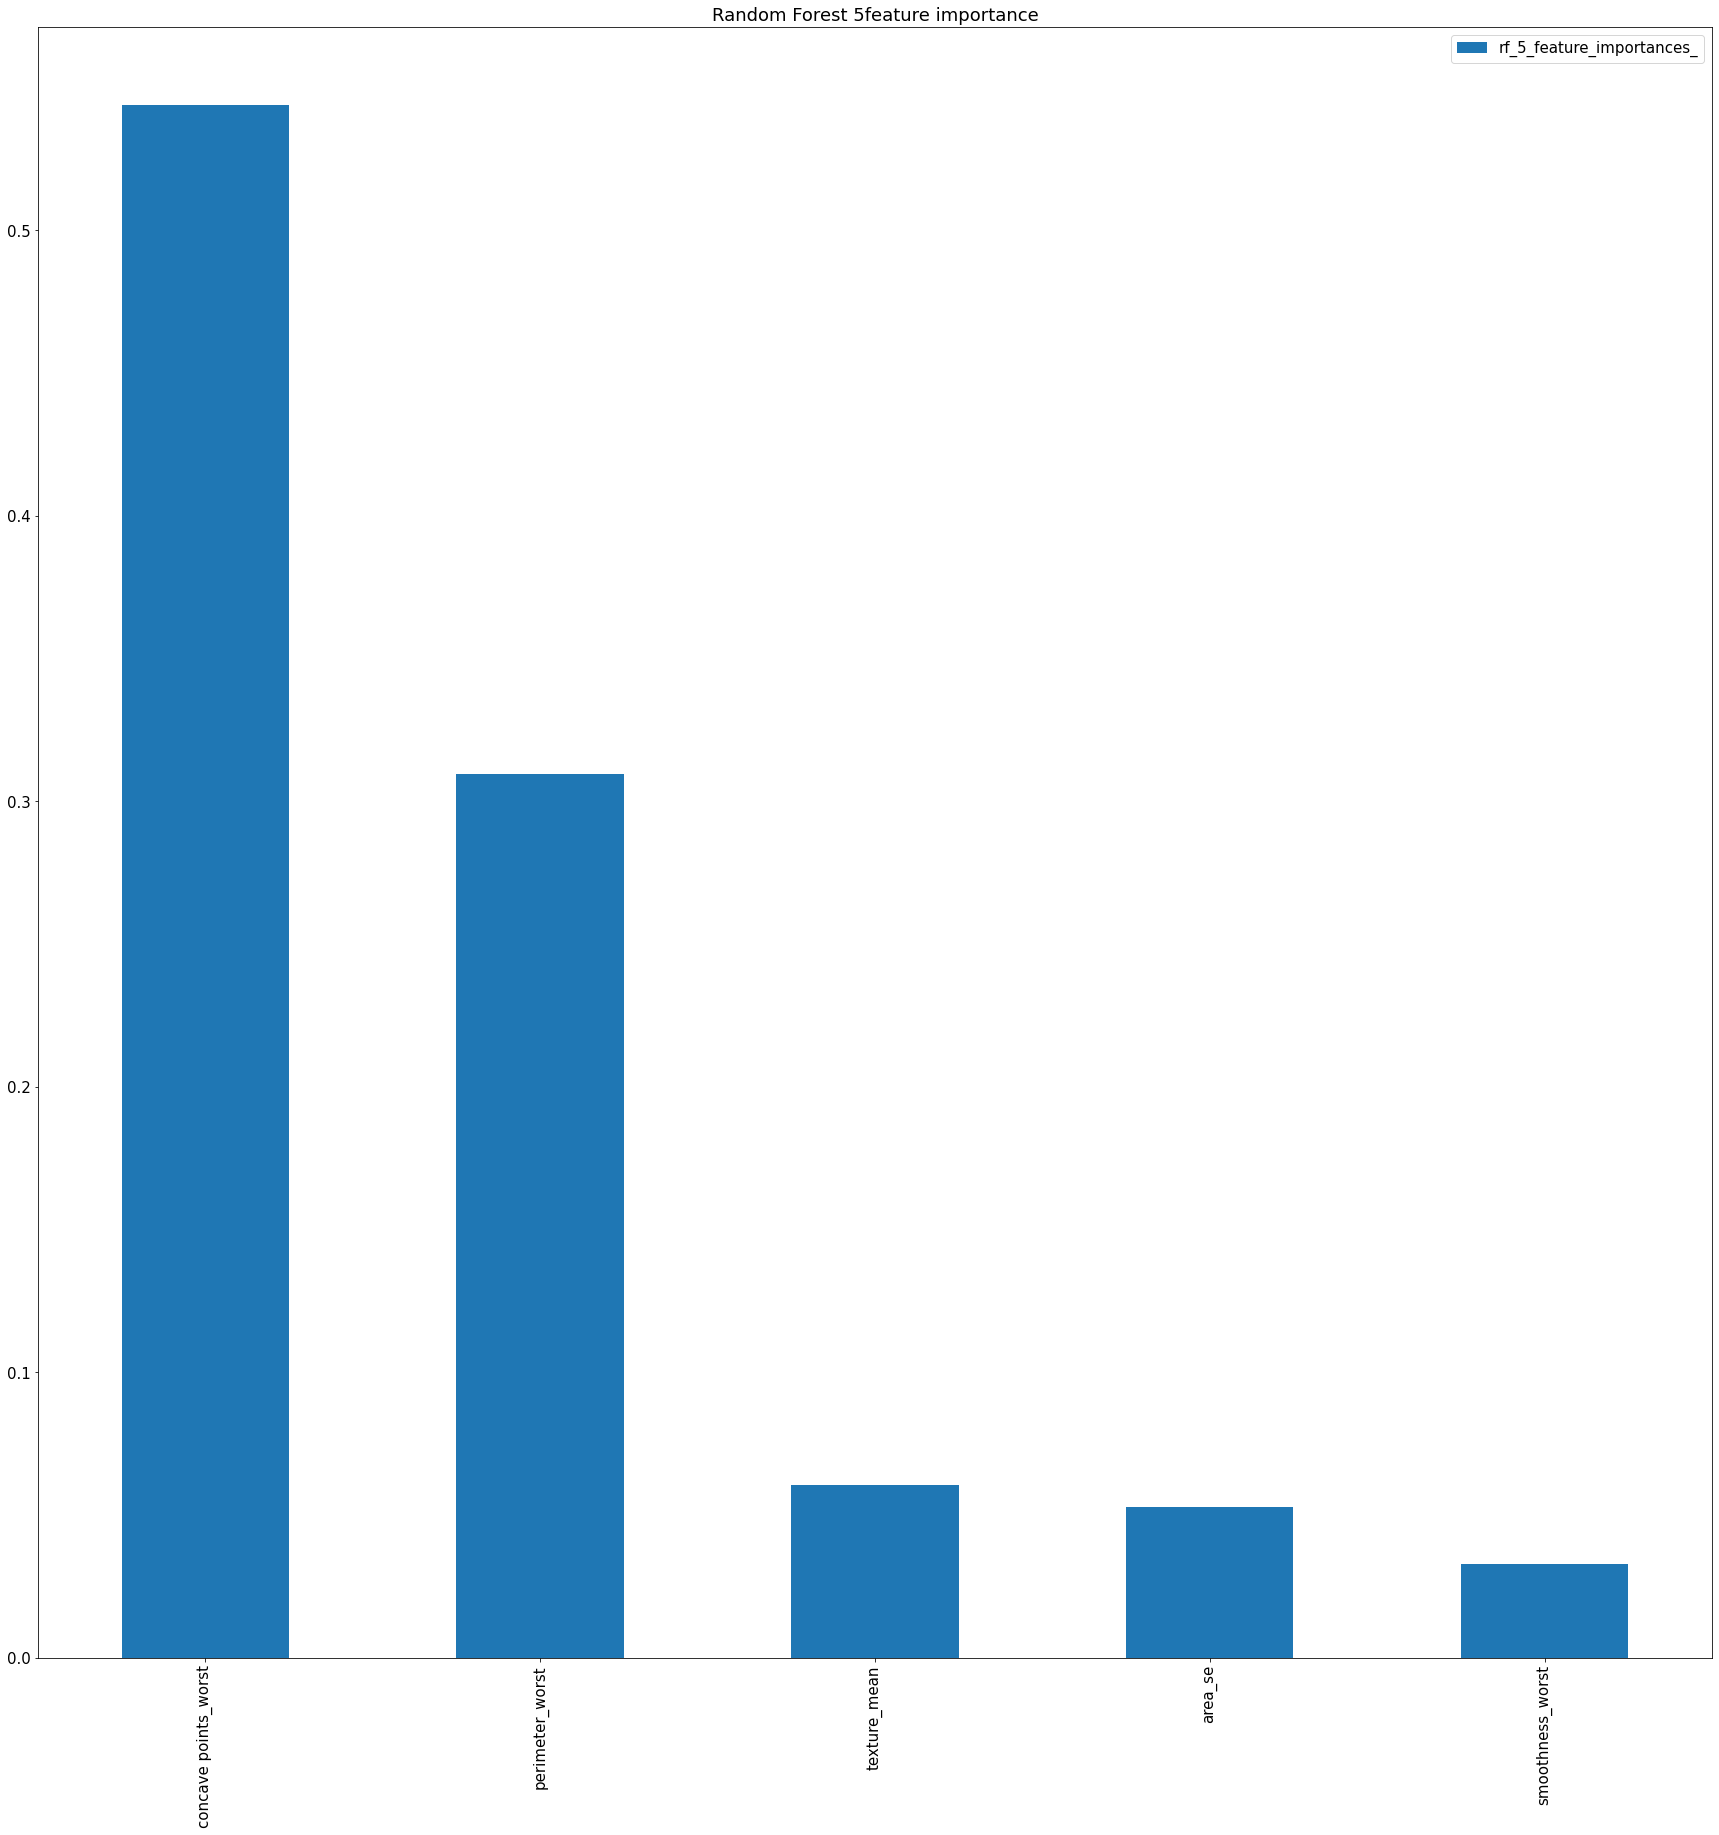

In [70]:
ax = df_fim_5[['feature_names_5','rf_5_feature_importances_']].sort_values(by='rf_5_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 5feature importance')
ax.set_xticklabels(df_fim_5.feature_names_5);

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_5 = RandomForestClassifier()
#Fitting the model
rfm_5.fit(Xtrain_5, ytrain_5.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(ytest_5, rfm_5.predict_proba(Xtest_5)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(ytest_5, rfm_5.predict_proba(Xtest_5)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr, rf_tpr, _ = roc_curve(ytest_5, rfm_5.predict_proba(Xtest_5)[:, 1])

ROC AUC score: 0.9953183520599251
Brier score is 0.02625874125874126



__Observation__

For all features 
ROC AUC score: 0.9968789013732834
Brier score is 0.023495104895104896
For 20 Features
ROC AUC score: 0.9953183520599251
Brier score is 0.024435664335664336
For 9 Features 
ROC AUC score: 0.9950062421972534
Brier score is 0.02716083916083916
For 5 Features 
ROC AUC score: 0.9953183520599251
Brier score is 0.02625874125874126
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
The smaller the Brier score loss, the better, hence the naming with “loss”. The Brier score measures the mean squared difference between the predicted probability and the actual outcome
The sets with all features, 20, and 9 where discarded because had a lot of variables with high collinearity
The sellection of 5 features was used for the Modeling testing
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

__Analysis of the association of the independant variable with the dependent variable__
Logistic regression summary is used to examine the association of (categorical or continuous) independent variable (s) with one dichotomous dependent variable in our case malignant o benign tumor.
The error bars are used to  visualize  the accuracy of the mean.

In [72]:
# defining the dependent and independent variables
# Xtrain = df_rscaled[["perimeter_worst", "texture_mean", "concavity_worst", 
#           "smoothness_worst", "compactness_worst", "area_se"]]
Xtrain_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
ytrain_5 = df_all_rscaled[['diagnosis']]

In [73]:
# building the model and fitting the data
Xtrain_5=sm.add_constant(Xtrain_5)
log_reg_rscale_5 = sm.Logit(ytrain_5, Xtrain_5).fit()

Optimization terminated successfully.
         Current function value: 0.076685
         Iterations 11


In [74]:
# printing the summary table
print(log_reg_rscale_5.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                  0.8839
Time:                        10:29:21   Log-Likelihood:                -43.634
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.736e-141
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6818      0.548     -6.714      0.000      -4.757      -2.607
perimeter_worst          6.5041      1.438      4.523      0.000       3.686       9.323
smoothness_w

__Observation__
From the results of the summary we can note that all the selected features are statistically significant (p < 0.05), which means that the risk of malignant tumor does in fact, depend on (perimeter, area, texture, smoothness and concave points).
All coefficients are positive the most influential are perimeter worst and conconcave point_worst that have the highest odds ratio that associates them to a malignant tumor.
A high Pseudo R-squ of 88% shows good fiting of the model


In [75]:
import pandas as pd

logreg = {'feature_er': ['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean'],
            'std_error': [2.8181, 1.1129, 1.1579, 2.4564, 0.8987], 
          'coef': [6.5041, 1.8509, 2.3079, 3.3854, 2.1147]} 


dfer = pd.DataFrame(logreg, columns = ['feature_er', 'std_error', 'coef'])

print (dfer)

             feature_er  std_error    coef
0       perimeter_worst     2.8181  6.5041
1      smoothness_worst     1.1129  1.8509
2               area_se     1.1579  2.3079
3  concave points_worst     2.4564  3.3854
4          texture_mean     0.8987  2.1147


In [76]:
import numpy as np
x_pos = np.arange(len(logreg['feature_er']))
height = dfer['coef']
error = dfer['std_error']
print(error)

0    2.8181
1    1.1129
2    1.1579
3    2.4564
4    0.8987
Name: std_error, dtype: float64


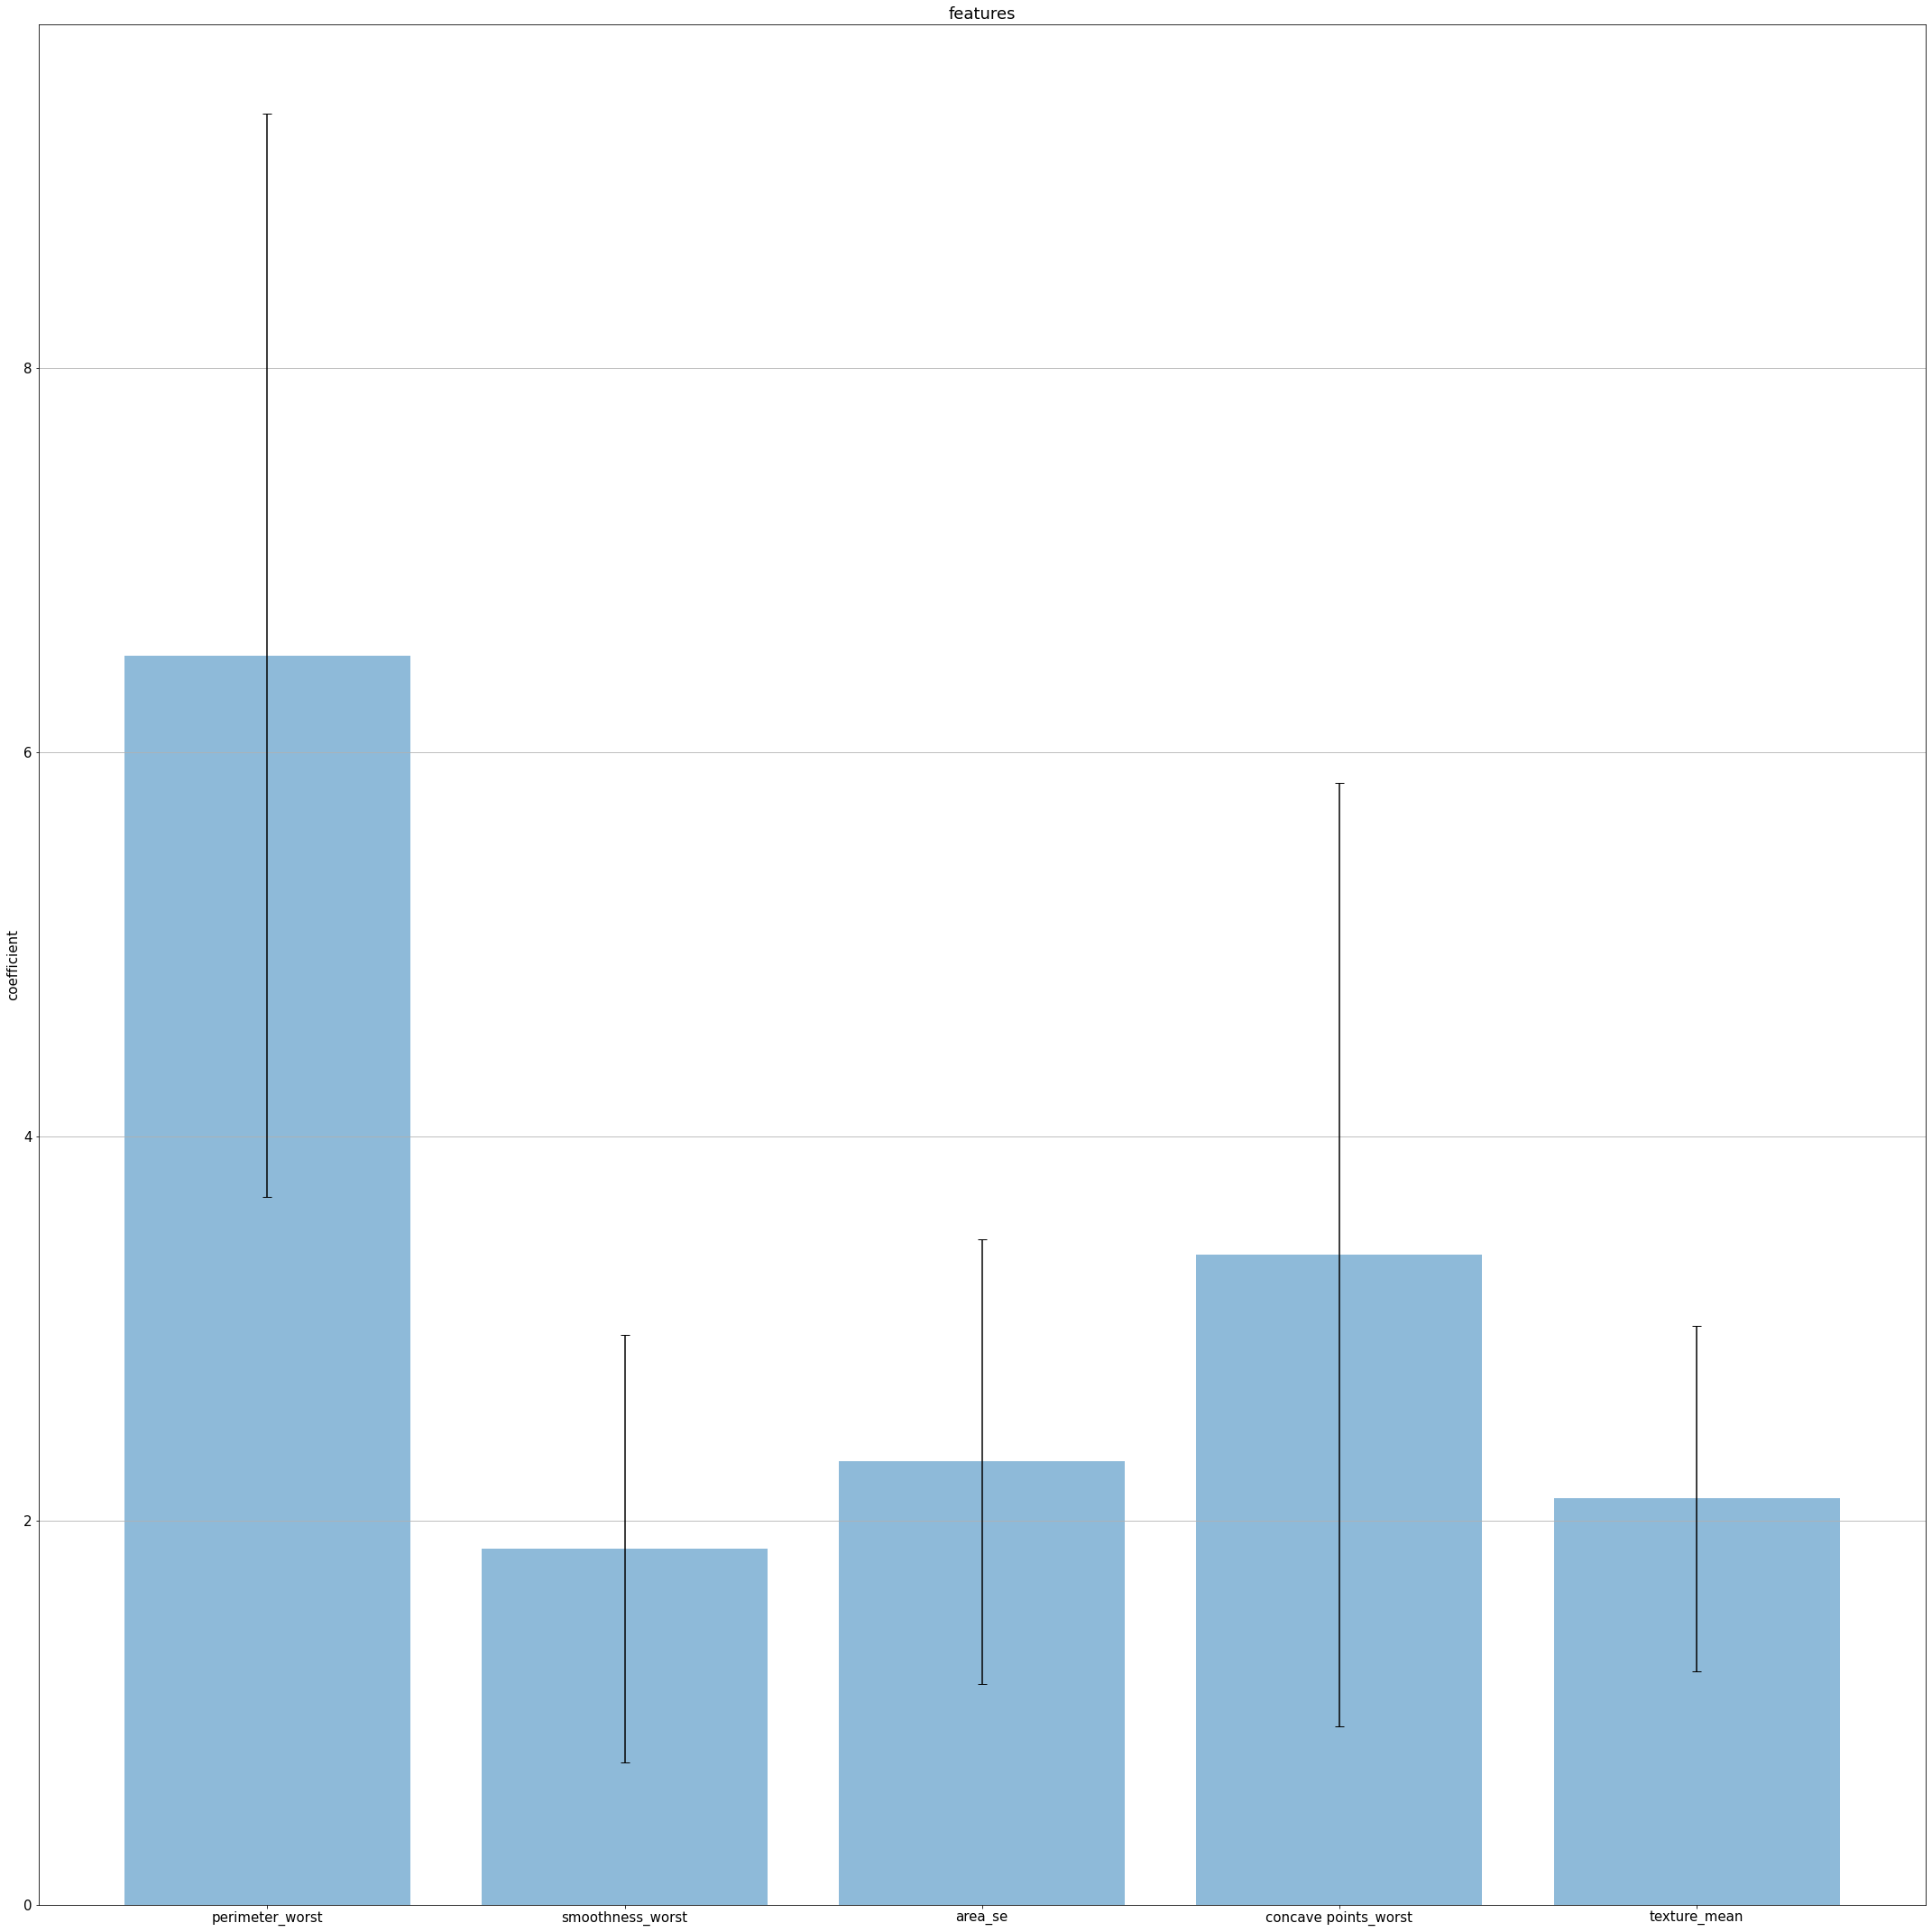

In [77]:
# Build the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('coefficient')
ax.set_xticks(x_pos)
ax.set_xticklabels(dfer.feature_er)
ax.set_title('features')
ax.yaxis.grid(True)
plt.rcParams['figure.figsize'] = [15,16]
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

__Observation__
The Error bars shows that the spread of the data around the mean value are large in all the selected features.
The Error bars shows as well how accurately the mean value represents the data (small SD bar = more reliable, larger SD bar = less reliable).  In our case it's important to note that having a larger SD, does not indicate that the data is not valid.  Biological measurements are notoriously variable.
The standard deviation errors bars overlap quite a bit between smoothnes, area, concave points and texture, this implies that the difference is not statistically significant , while the difference is statistically significant between perimeter&smoothness, perimeter&area, and perimeter$texture where there are no overlat.
A statistically significant relationship (eg one event causing another, or two events having a common cause, or two events moving in the same/opposite directions) means the connection between the two events is shown mathematically not to have occurred randomly or by chance.

__Modeling__
comparing different methods of prediction: Random Forest, Bossting gradient, Logistic Regression

Tunning for best Parameters  

Cross _validation score (ROC_AUC)

In [78]:
X_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5 = df_all_rscaled[['diagnosis']]
X_5=sm.add_constant(X_5)

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv = GridSearchCV(rfm, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv.fit(X_train, y_train.values.ravel())

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 6, 'n_estimators': 17}
Best score is 0.9944198451794511


In [80]:
#Instantiate the model with best parameters acquired from GridCV Search
rfm = RandomForestClassifier(max_depth=6, n_estimators=17)
#Fitting the model
rfm.fit(X_train, y_train.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(y_test, rfm.predict_proba(X_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_test, rfm.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rfm.predict_proba(X_test)[:, 1])

ROC AUC score: 0.9950029394473838
Brier score is 0.025998574611966387


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
X_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5 = df_all_rscaled[['diagnosis']]
X_5=sm.add_constant(X_5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.30, random_state = 42)

n_estimators = np.arange(1,50)
max_depth = [1,2,4,8]
learning_rate = [.05,.1,.2,.5,1]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm = GradientBoostingClassifier()
# Instantiate the RandomSearchCV object: 
gbm_cv = RandomizedSearchCV(gbm, param_distributions = param_dist, cv=5, scoring='roc_auc', n_iter=30)

# Fitting the model
gbm_cv.fit(X_train, y_train.values.ravel())

print("Tuned Gradient Boosting Parameters: {}".format(gbm_cv.best_params_)) 
print("Best score is {}".format(gbm_cv.best_score_))

Tuned Gradient Boosting Parameters: {'n_estimators': 45, 'max_depth': 1, 'learning_rate': 0.2}
Best score is 0.9898111658456485


In [82]:
gbm = GradientBoostingClassifier(n_estimators= 45, max_depth= 1, learning_rate=0.2, random_state=42).fit(X_train, y_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_test, gbm.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

gb_fpr, gb_tpr, _ = roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])

Best ROC AUC: 0.9963256907701351
Brier score is 0.022798270528624206


In [83]:
#Using feature_set1
X_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5 = df_all_rscaled[['diagnosis']]
X_5=sm.add_constant(X_5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.30, random_state = 42)


# Setup the hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv.fit(X_train,y_train.values.ravel())

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_test, logreg_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
lr_fpr, lr_tpr, _ = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:, 1])


Tuned Logistic Regression Parameters: {'C': 1}
Best AUC-ROC score is 0.9927393854093362
Brier score is 0.015712575066601314


In [84]:
lr = LogisticRegression(C = 1, random_state = 42).fit(X_train, y_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_test, lr.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

Best ROC AUC: 0.9988242210464433
Brier score is 0.015712575066601314


__Random Forest__ 
Best ROC AUC: 0.9950029394473838
Brier score: 0.025998574611966387

__Boosting  Gradient__
Best ROC AUC: 0.9963256907701351
Brier score: 0.022798270528624206

__Logistic Regression__
Best ROC AUC: 0.9988242210464433
Brier score: 0.015712575066601314

__Observation__

The Logistic Regression algorithm had the highest Cross_validated Score (ROC_AUC)  and the lowest Brier Score

__Model evaluation visualization__

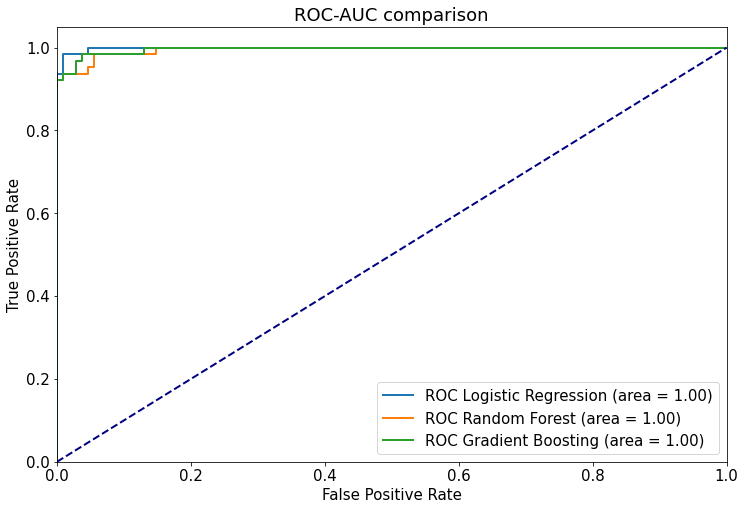

In [85]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr,lr_tpr,'Logistic Regression'),(rf_fpr,rf_tpr,'Random Forest'),(gb_fpr,gb_tpr,'Gradient Boosting')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

__Cofusion Matrix__

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model

In [86]:
from sklearn.metrics import confusion_matrix, fbeta_score

# #Using the Random Forest Model the confusion matrix is generated
X_5 = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5 = df_all_rscaled[['diagnosis']]
X_5=sm.add_constant(X_5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size = 0.30, random_state = 42)
confusion_lrm = confusion_matrix(y_test, logreg_cv.predict(X_test))
print(confusion_lrm)

[[107   1]
 [  2  61]]


<Figure size 1080x1152 with 0 Axes>

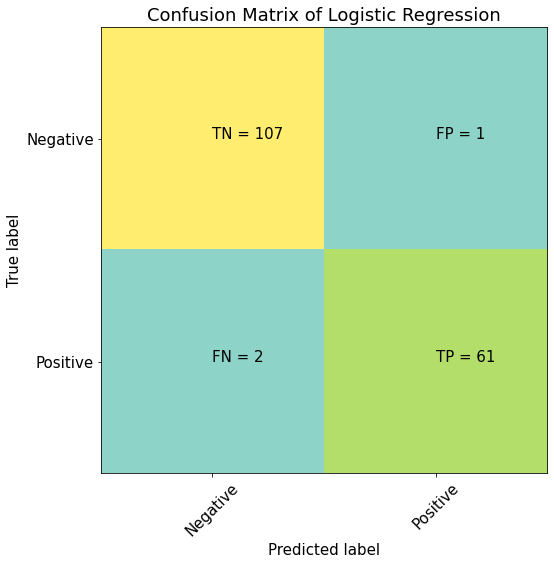

In [101]:
cm = confusion_matrix(y_test, logreg_cv.predict(X_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

__Observation__

From the results of the confussion matrix we can say that a good model was obtained because has high TP and TN rates, while low FP and FN rates.

__Classification report__

The clasification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below. 

The F-measure balances the precision and recall.
Maximizing precision minimizes false positives, and maximizing recall minimizes false negatives.
In our case Recall is more important  than the precision as in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected then we use The F2-measure with a beta value of 2.0


In [106]:
from sklearn.metrics import classification_report

def precision_recall(logreg_cv, X_test, y_test, threshold, beta = 2.):
    
    y_pred = (logreg_cv.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# tumors that were predicted to be benign and did
    tp = matrix[1,1]# tumors that were predicted to be malignant and did
    fp = matrix[0,1]# tumors that were predicted to be benign but where malignant
    fn = matrix[1,0]# tumors that were predicted to be malign but where benign
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [107]:
y_pred = (logreg_cv.predict_proba(X_test)[:,1] >= 0.45).astype(bool)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       108
         1.0       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [104]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F_measure'])

for threshold in np.arange(0.0,1,0.05):
    
    threshold_df.loc[threshold] = precision_recall(logreg_cv, X_test, y_test, threshold)
 
print(threshold_df)

      Precision    Recall  F_measure
0.00   0.368421  1.000000   0.744681
0.05   0.700000  1.000000   0.921053
0.10   0.818182  1.000000   0.957447
0.15   0.851351  1.000000   0.966258
0.20   0.887324  1.000000   0.975232
0.25   0.926471  1.000000   0.984375
0.30   0.939394  0.984127   0.974843
0.35   0.953846  0.984127   0.977918
0.40   0.968750  0.984127   0.981013
0.45   0.983871  0.968254   0.971338
0.50   0.983871  0.968254   0.971338
0.55   0.983871  0.968254   0.971338
0.60   0.983607  0.952381   0.958466
0.65   1.000000  0.936508   0.948553
0.70   1.000000  0.936508   0.948553
0.75   1.000000  0.904762   0.922330
0.80   1.000000  0.904762   0.922330
0.85   1.000000  0.888889   0.909091
0.90   1.000000  0.857143   0.882353
0.95   1.000000  0.793651   0.827815


__Precision-recall threshold__
Some classification tasks require a crisp class label prediction. This means that even though a probability or scoring of class membership is predicted, it must be converted into a crisp class label.
The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.
The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities and when the cost of one type of misclassification is more important than another type of misclassification selecting an optimal threshold is necessary.


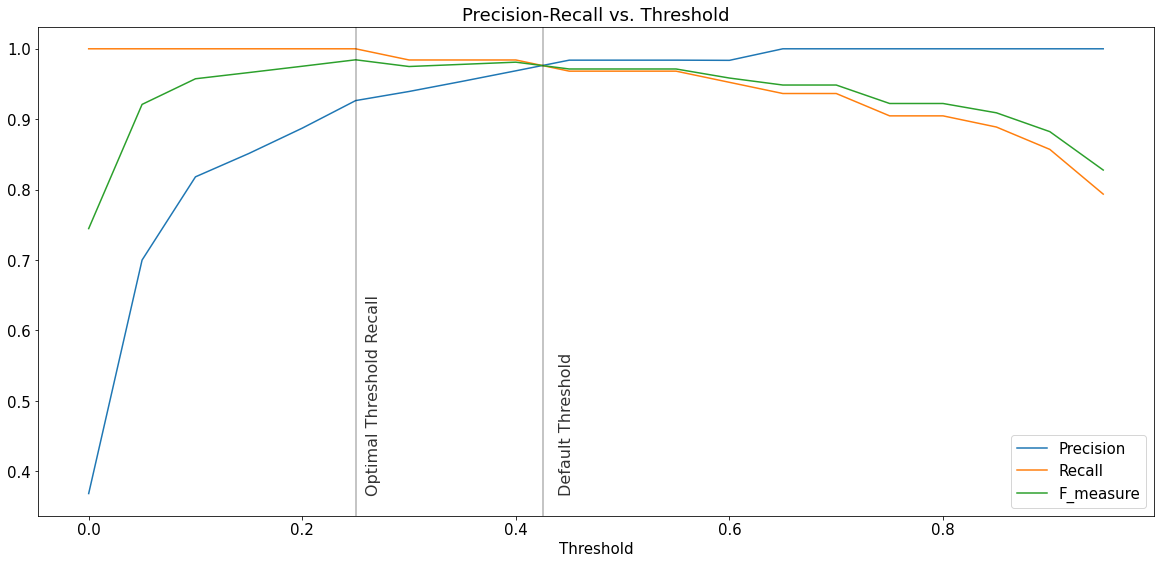

In [105]:
ax = threshold_df.plot(figsize=(20,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.25, color='black', alpha=0.3)
ax.text(.26,.37,'Optimal Threshold Recall',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.425, color ='black', alpha = 0.3)
ax.text(.44,.37,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

__Observation__
The threshold that represent the  optimal interpretation in this study is 0.25 where
recall = 1.0 , precision = 0.926471  and F-measure = 0.984375